In [574]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [575]:
# python3 -m pip install xlrd
release_sheets = pd.read_excel("orig/release.xlsx", sheetname=None, skiprows=range(0,6))


In [576]:
release_sheets.keys()

odict_keys(['release_F9', 'release_GP1BB', 'release_HBB', 'release_HBG1', 'release_HNF4A', 'release_IRF4', 'release_IRF6', 'release_LDLR', 'release_MSMB', 'release_MYCrs6983267', 'release_PKLR', 'release_SORT1', 'release_TERT-GBM', 'release_TERT-HEK293T', 'release_ZFAND3'])

In [577]:
release_sheets['release_ZFAND3'].head()

#Chrom       Pos Ref Alt  Value  Confidence
0       6  37775274   C   G   0.02        0.00
1       6  37775274   C   T   0.35        0.02
2       6  37775275   G   A  -0.09        0.02
3       6  37775275   G   C   0.00        0.00
4       6  37775275   G   T  -0.09        0.01

In [578]:
for k in release_sheets.keys():
    release_sheets[k]["tag"]=k.split("_")[1]

In [579]:
all = pd.concat(release_sheets.values())

In [580]:
all["Pos"] = all["Pos"].astype("int")
all["#Chrom"] = all["#Chrom"].astype("str")

In [581]:
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag
0      X  138612669   T   A  -0.17        0.07  F9
1      X  138612669   T   C  -0.26        0.24  F9
2      X  138612669   T   G   0.34        0.05  F9
3      X  138612670   A   C   0.00        0.00  F9
4      X  138612670   A   G   0.22        0.20  F9

In [582]:
all.tail()

#Chrom       Pos Ref Alt  Value  Confidence     tag
486      6  37775852   G   C  -0.11        0.00  ZFAND3
487      6  37775852   G   T  -0.13        0.02  ZFAND3
488      6  37775853   A   C   0.00        0.00  ZFAND3
489      6  37775853   A   G   0.09        0.01  ZFAND3
490      6  37775853   A   T  -0.06        0.01  ZFAND3

In [583]:
used_pos_stats = all.groupby(["tag","#Chrom"]).Pos.agg(["min", "max","count", lambda x: x.unique().shape[0]]).rename(columns={"<lambda>":"uniq"})

In [584]:
used_pos_stats["len"] = used_pos_stats["max"] - used_pos_stats["min"] 
used_pos_stats.reset_index(inplace=True)
used_pos_stats = used_pos_stats[used_pos_stats.columns[0:]].sort_values(by=["#Chrom","min","max"])

In [585]:
used_pos_stats

tag #Chrom        min        max  count  uniq  len
11         SORT1      1  109817337  109817736    430   144  399
10          PKLR      1  155271234  155271649    384   128  415
6           IRF6      1  209989199  209989694    429   144  495
8           MSMB     10   51549083   51549578    432   144  495
2            HBB     11    5248268    5248439    132    44  171
3           HBG1     11    5271051    5271274    192    64  223
7           LDLR     19   11199906   11200177    238    80  271
4          HNF4A     20   42984207   42984444    186    62  237
1          GP1BB     22   19710804   19711139    288    96  335
12      TERT-GBM      5    1295104    1295362    200    67  258
13  TERT-HEK293T      5    1295104    1295362    200    67  258
5           IRF4      6     396142     396589    384   128  447
14        ZFAND3      6   37775274   37775853    491   164  579
9   MYCrs6983267      8  128413073  128413664    428   144  591
0             F9      X  138612669  138612924    236    80  255

In [586]:
used_pos_stats[["#Chrom","min", "max"]].to_csv(sep = "\t", header=False, index = False).split("\n")

['1\t109817337\t109817736',
 '1\t155271234\t155271649',
 '1\t209989199\t209989694',
 '10\t51549083\t51549578',
 '11\t5248268\t5248439',
 '11\t5271051\t5271274',
 '19\t11199906\t11200177',
 '20\t42984207\t42984444',
 '22\t19710804\t19711139',
 '5\t1295104\t1295362',
 '5\t1295104\t1295362',
 '6\t396142\t396589',
 '6\t37775274\t37775853',
 '8\t128413073\t128413664',
 'X\t138612669\t138612924',
 '']

In [587]:
used_pos_stats[["#Chrom","min", "max"]].to_csv("poi.bed", sep = "\t", header=False, index = False)

In [588]:
all[all["tag"]=="IRF4"].head(5)

#Chrom     Pos Ref Alt  Value  Confidence   tag
0      6  396142   T   A  -0.02        0.00  IRF4
1      6  396142   T   C   0.02        0.00  IRF4
2      6  396142   T   G   0.15        0.07  IRF4
3      6  396143   G   A  -0.09        0.03  IRF4
4      6  396143   G   C  -0.16        0.06  IRF4

In [589]:
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag
0      X  138612669   T   A  -0.17        0.07  F9
1      X  138612669   T   C  -0.26        0.24  F9
2      X  138612669   T   G   0.34        0.05  F9
3      X  138612670   A   C   0.00        0.00  F9
4      X  138612670   A   G   0.22        0.20  F9

In [590]:
! head -n 2 orig/template.txt

Chrom	Pos	Ref	Alt	Promoter_Enhancer	Direction	P_Direction	Confidence	SE	Comments
1	109817273	C	A	SORT1	*	*	*	*	*


In [591]:
tmplt = pd.read_csv("orig/template.txt", sep="\t", header = 0, dtype={"Chrom":"str", "Pos":"int"})
tmplt.head()

Chrom        Pos Ref Alt Promoter_Enhancer Direction P_Direction Confidence  \
0     1  109817273   C   A             SORT1         *           *          *   
1     1  109817273   C   G             SORT1         *           *          *   
2     1  109817274   G   A             SORT1         *           *          *   
3     1  109817274   G   C             SORT1         *           *          *   
4     1  109817274   G   T             SORT1         *           *          *   

  SE Comments  
0  *        *  
1  *        *  
2  *        *  
3  *        *  
4  *        *

In [592]:
tmplt.Promoter_Enhancer.unique()

array(['SORT1', 'PKLR', 'IRF6', 'TERT-GBM', 'TERT-HEK293T', 'IRF4',
       'ZFAND3', 'MYC', 'MSMB', 'HBB', 'HBG1', 'LDLR', 'HNF4A', 'GP1BB',
       'F9'], dtype=object)

In [593]:
dict(zip(sorted(all.tag.unique()), sorted(tmplt.Promoter_Enhancer.unique())))

{'F9': 'F9',
 'GP1BB': 'GP1BB',
 'HBB': 'HBB',
 'HBG1': 'HBG1',
 'HNF4A': 'HNF4A',
 'IRF4': 'IRF4',
 'IRF6': 'IRF6',
 'LDLR': 'LDLR',
 'MSMB': 'MSMB',
 'MYCrs6983267': 'MYC',
 'PKLR': 'PKLR',
 'SORT1': 'SORT1',
 'TERT-GBM': 'TERT-GBM',
 'TERT-HEK293T': 'TERT-HEK293T',
 'ZFAND3': 'ZFAND3'}

In [594]:
repl_ = dict(filter(lambda x: x[0] != x[1], zip(sorted(tmplt.Promoter_Enhancer.unique()), sorted(all.tag.unique()))))
repl_

{'MYC': 'MYCrs6983267'}

In [595]:
tmplt["tag"] = tmplt["Promoter_Enhancer"].apply(lambda x: x in repl_ and repl_[x] or x)
tmplt["#Chrom"] = tmplt["Chrom"]
tmplt["Value"] = np.nan
tmplt["Confidence"] = np.nan
tmplt = tmplt.drop_duplicates()
tmplt.head()

Chrom        Pos Ref Alt Promoter_Enhancer Direction P_Direction  \
0     1  109817273   C   A             SORT1         *           *   
1     1  109817273   C   G             SORT1         *           *   
2     1  109817274   G   A             SORT1         *           *   
3     1  109817274   G   C             SORT1         *           *   
4     1  109817274   G   T             SORT1         *           *   

   Confidence SE Comments    tag #Chrom  Value  
0         NaN  *        *  SORT1      1    NaN  
1         NaN  *        *  SORT1      1    NaN  
2         NaN  *        *  SORT1      1    NaN  
3         NaN  *        *  SORT1      1    NaN  
4         NaN  *        *  SORT1      1    NaN

In [596]:
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag
0      X  138612669   T   A  -0.17        0.07  F9
1      X  138612669   T   C  -0.26        0.24  F9
2      X  138612669   T   G   0.34        0.05  F9
3      X  138612670   A   C   0.00        0.00  F9
4      X  138612670   A   G   0.22        0.20  F9

In [597]:
pre3 = pd.read_csv("trivariate.tab.gz",  sep="\t", header = None , names=["tag", "offset", "Alt", "fc", "pval.raw"])
pre3 = pre3[(pre3.tag != "ltv1-1") & (pre3.tag != "ltv1-2")]

pre3["#Chrom"] = str(2)
pre3.loc[pre3.tag == "aldob", "#Chrom"] = str(9)

pre3["Pos"] = pre3.offset + 104195570 - 1 
pre3.loc[pre3.tag == "ecr11", "Pos"] = pre3[pre3.tag == "ecr11"].offset + 169939082 - 1

pre3["Ref"] = "N"
pre3["Value"] = pre3.fc

#log_confidence = (confidence <= 1e-50) ? 1.0 : (-Math.log10(confidence) / 50.0 )
pre3["Confidence"] = pre3["pval.raw"].apply(lambda x: x <= 1e-50 and 1.0 or -np.log10(x) / 50.0)

pre3 = pre3["#Chrom Pos Ref Alt Value Confidence tag".split()]

pre3.head()



#Chrom        Pos Ref Alt     Value  Confidence    tag
0      9  104195570   N   A -0.152173    0.034332  aldob
1      9  104195570   N   C -0.117352    0.018132  aldob
2      9  104195570   N   G -0.120354    0.019410  aldob
3      9  104195571   N   A  0.012217    0.001358  aldob
4      9  104195571   N   G  0.402168    0.138383  aldob

In [598]:
all = pd.concat([all, tmplt[all.columns], pre3]).sort_values(by=["tag", "#Chrom","Pos","Ref", "Alt"])
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag
12965      X  138612621   C   A    NaN         NaN  F9
12966      X  138612621   C   G    NaN         NaN  F9
12967      X  138612621   C   T    NaN         NaN  F9
12968      X  138612622   G   A    NaN         NaN  F9
12969      X  138612622   G   C    NaN         NaN  F9

In [599]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag
2632      2  169939700   N   G -1.364910    0.851973  ecr11
2633      2  169939700   N   T -1.069100    0.664361  ecr11
2634      2  169939701   N   C -0.171114    0.032700  ecr11
2635      2  169939701   N   G -1.014040    0.522216  ecr11
2636      2  169939701   N   T -0.489971    0.198231  ecr11

In [600]:
used_pos_stats = all.groupby(["tag","#Chrom"]).Pos.agg(["min", "max","count", lambda x: x.unique().shape[0]]).rename(columns={"<lambda>":"uniq"})
used_pos_stats["len"] = used_pos_stats["max"] - used_pos_stats["min"] + 1
used_pos_stats.reset_index(inplace=True)
used_pos_stats = used_pos_stats[used_pos_stats.columns[0:]].sort_values(by=["#Chrom","min","max"])
used_pos_stats

tag #Chrom        min        max  count  uniq  len
11         SORT1      1  109817273  109817873   1790   601  601
10          PKLR      1  155271186  155271656   1409   471  471
6           IRF6      1  209989135  209989736   1786   602  602
8           MSMB     10   51548987   51549578   1149   383  592
2            HBB     11    5248252    5248439    564   188  188
3           HBG1     11    5271035    5271309    825   275  275
7           LDLR     19   11199906   11200224    955   319  319
16         ecr11      2  169939082  169939701   1860   620  620
4          HNF4A     20   42984159   42984444    858   286  286
1          GP1BB     22   19710788   19711173   1157   386  386
12      TERT-GBM      5    1295104    1295362    775   259  259
13  TERT-HEK293T      5    1295104    1295362    775   259  259
5           IRF4      6     396142     396593   1356   452  452
14        ZFAND3      6   37775274   37775853   1738   580  580
9   MYCrs6983267      8  128413073  128413673   1792   601  601
15         aldob      9  104195570  104195828    777   259  259
0             F9      X  138612621  138612924    907   304  304

In [601]:
print(all[all.tag=="ecr11"].head())

    #Chrom        Pos Ref Alt     Value  Confidence    tag
777      2  169939082   N   A  0.081440    0.006632  ecr11
778      2  169939082   N   G -0.093241    0.007716  ecr11
779      2  169939082   N   T  0.190447    0.021948  ecr11
780      2  169939083   N   A -0.059563    0.005493  ecr11
781      2  169939083   N   C -0.009981    0.000811  ecr11


In [602]:
not_used_pos = []
for it in used_pos_stats[["tag", "#Chrom", "min", "max"]].itertuples():
    #print(it)
    t = pd.DataFrame({"#Chrom": str(it[2]),
                      "Pos" : list(range(it[3], it[4]+1)),
                      "Ref":"N",
                      "Alt": "N",
                      "Value": np.nan,
                      "Confidence": np.nan,
                      "tag" : it.tag
                     }, columns = ["#Chrom Pos Ref Alt Value Confidence tag".split()])
    _used = all[(all.tag == it.tag) & (all["#Chrom"] == str(it[2]))].Pos.unique().tolist()
    t = t[t.Pos.apply(lambda x: x  not in _used)]
    if len(t):
        not_used_pos.append(t)

In [603]:
all = pd.concat([all] + not_used_pos).sort_values(by=["tag", "#Chrom","Pos","Ref", "Alt"])
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag
12965      X  138612621   C   A    NaN         NaN  F9
12966      X  138612621   C   G    NaN         NaN  F9
12967      X  138612621   C   T    NaN         NaN  F9
12968      X  138612622   G   A    NaN         NaN  F9
12969      X  138612622   G   C    NaN         NaN  F9

In [604]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag
2632      2  169939700   N   G -1.364910    0.851973  ecr11
2633      2  169939700   N   T -1.069100    0.664361  ecr11
2634      2  169939701   N   C -0.171114    0.032700  ecr11
2635      2  169939701   N   G -1.014040    0.522216  ecr11
2636      2  169939701   N   T -0.489971    0.198231  ecr11

In [605]:
%ls features_out/

ls: cannot access 'features_out/': No such file or directory


In [606]:
ref = pd.read_csv("features_pre.20180227/ref.tsv.gz", sep="\t", header = None, dtype={"#Chrom":"str", "Pos":"int", "Ref.hg19.75":"str"}, names=["#Chrom", "Pos", "Ref.hg19.75"])
ref.head()

#Chrom        Pos Ref.hg19.75
0      X  138602669           A
1      X  138602670           G
2      X  138602671           A
3      X  138602672           A
4      X  138602673           T

In [607]:
all = all.merge(ref, how = "left", on = ["#Chrom", "Pos"])
all.loc[all.Ref == "N", "Ref"] = all[all.Ref == "N"]["Ref.hg19.75"]

all["Ref_matched"] = (all["Ref"] == all["Ref.hg19.75"])

In [608]:
all[all["Ref_matched"] == False]

#Chrom        Pos Ref Alt  Value  Confidence           tag Ref.hg19.75  \
0          X  138612621   C   A    NaN         NaN            F9           G   
1          X  138612621   C   G    NaN         NaN            F9           G   
2          X  138612621   C   T    NaN         NaN            F9           G   
3450      11    5271309   G   A    NaN         NaN          HBG1           T   
3451      11    5271309   G   C    NaN         NaN          HBG1           T   
3452      11    5271309   G   T    NaN         NaN          HBG1           T   
3453      20   42984159   C   A    NaN         NaN         HNF4A           A   
3454      20   42984159   C   G    NaN         NaN         HNF4A           A   
3455      20   42984159   C   T    NaN         NaN         HNF4A           A   
4311       6     396142   T   A  -0.02        0.00          IRF4           G   
4312       6     396142   T   C   0.02        0.00          IRF4           G   
4313       6     396142   T   G   0.15        0.07          IRF4           G   
8408      10   51548987   C   A    NaN         NaN          MSMB           G   
8409      10   51548987   C   G    NaN         NaN          MSMB           G   
8410      10   51548987   C   T    NaN         NaN          MSMB           G   
9766       8  128413073   C   A   0.09        0.00  MYCrs6983267           G   
9767       8  128413073   C   T  -0.03        0.00  MYCrs6983267           G   
12967      1  109817273   C   A    NaN         NaN         SORT1           G   
12968      1  109817273   C   G    NaN         NaN         SORT1           G   
17857      6   37775274   C   G   0.02        0.00        ZFAND3           T   
17858      6   37775274   C   T   0.35        0.02        ZFAND3           T   

       Ref_matched  
0            False  
1            False  
2            False  
3450         False  
3451         False  
3452         False  
3453         False  
3454         False  
3455         False  
4311         False  
4312         False  
4313         False  
8408         False  
8409         False  
8410         False  
9766         False  
9767         False  
12967        False  
12968        False  
17857        False  
17858        False

In [609]:
gerp_rs = pd.read_csv("features_pre.20180227/gerp_rs.tsv.gz", sep="\t", header = None, dtype={"#Chrom":"str", "Pos":"int", "gerp_rs":"float"}, names=["#Chrom", "Pos", "gerp_rs"])
all = all.merge(gerp_rs, how = "left", on = ["#Chrom", "Pos"])

In [610]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag Ref.hg19.75  \
22227      2  169939700   A   G -1.364910    0.851973  ecr11           A   
22228      2  169939700   A   T -1.069100    0.664361  ecr11           A   
22229      2  169939701   A   C -0.171114    0.032700  ecr11           A   
22230      2  169939701   A   G -1.014040    0.522216  ecr11           A   
22231      2  169939701   A   T -0.489971    0.198231  ecr11           A   

       Ref_matched  gerp_rs  
22227         True     3.75  
22228         True     3.75  
22229         True     4.92  
22230         True     4.92  
22231         True     4.92

In [611]:
phyloP100way = pd.read_csv("features_pre.20180227/p100w.poi.gz", sep="\t", header = None, dtype={"#Chrom":"str", "chr":"str","Pos":"int", "phyloP100way":"float"}, names=["#Chrom", "chr", "Pos", "phyloP100way"])
phyloP100way = phyloP100way.drop(["chr"], axis = 1)
all = all.merge(phyloP100way, how = "left", on = ["#Chrom", "Pos"])

In [612]:
phyloP46way = pd.read_csv("features_pre.20180227/p46w.poi.gz", sep="\t", header = None, dtype={"#Chrom":"str", "chr":"str","Pos":"int", "phyloP46way":"float"}, names=["#Chrom", "chr", "Pos", "phyloP46way"])
phyloP46way = phyloP46way.drop(["chr"], axis = 1)
all = all.merge(phyloP46way, how = "left", on = ["#Chrom", "Pos"])


In [613]:
phastCons46way = pd.read_csv("features_pre.20180227/pc46w.poi.gz", sep="\t", header = None, dtype={"#Chrom":"str", "chr":"str","Pos":"int", "phastCons46way":"float"}, names=["#Chrom", "chr", "Pos", "phastCons46way"])
phastCons46way = phastCons46way.drop(["chr"], axis = 1)
all = all.merge(phastCons46way, how = "left", on = ["#Chrom", "Pos"])


In [614]:
phastCons100way = pd.read_csv("features_pre.20180227/pc100w.poi.gz", sep="\t", header = None, dtype={"#Chrom":"str", "chr":"str","Pos":"int", "phastCons100way":"float"}, names=["#Chrom", "chr", "Pos", "phastCons100way"])
phastCons100way = phastCons100way.drop(["chr"], axis = 1)
all = all.merge(phastCons100way, how = "left", on = ["#Chrom", "Pos"])


In [615]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag Ref.hg19.75  \
22227      2  169939700   A   G -1.364910    0.851973  ecr11           A   
22228      2  169939700   A   T -1.069100    0.664361  ecr11           A   
22229      2  169939701   A   C -0.171114    0.032700  ecr11           A   
22230      2  169939701   A   G -1.014040    0.522216  ecr11           A   
22231      2  169939701   A   T -0.489971    0.198231  ecr11           A   

       Ref_matched  gerp_rs  phyloP100way  phyloP46way  phastCons46way  \
22227         True     3.75         1.769        0.482           0.829   
22228         True     3.75         1.769        0.482           0.829   
22229         True     4.92         1.858        0.482           0.824   
22230         True     4.92         1.858        0.482           0.824   
22231         True     4.92         1.858        0.482           0.824   

       phastCons100way  
22227            0.464  
22228            0.464  
22229            0.435  
22230            0.435  
22231            0.435

In [616]:
mz46 =  pd.read_csv("features_pre.20180227/maf.46.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int", "mz46_pre":"str"}, names=["#Chrom", "Pos", "mz46_pre"])
mz100 =  pd.read_csv("features_pre.20180227/maf.100.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int", "mz100_pre":"str"}, names=["#Chrom", "Pos", "mz100_pre"])
mz46["Pos"] = mz46["Pos"] + 1
mz100["Pos"] = mz100["Pos"] + 1
all = all.merge(mz46, how = "left", on = ["#Chrom", "Pos"])
all = all.merge(mz100, how = "left", on = ["#Chrom", "Pos"])

In [617]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag Ref.hg19.75  \
22227      2  169939700   A   G -1.364910    0.851973  ecr11           A   
22228      2  169939700   A   T -1.069100    0.664361  ecr11           A   
22229      2  169939701   A   C -0.171114    0.032700  ecr11           A   
22230      2  169939701   A   G -1.014040    0.522216  ecr11           A   
22231      2  169939701   A   T -0.489971    0.198231  ecr11           A   

       Ref_matched  gerp_rs  phyloP100way  phyloP46way  phastCons46way  \
22227         True     3.75         1.769        0.482           0.829   
22228         True     3.75         1.769        0.482           0.829   
22229         True     4.92         1.858        0.482           0.824   
22230         True     4.92         1.858        0.482           0.824   
22231         True     4.92         1.858        0.482           0.824   

       phastCons100way      mz46_pre     mz100_pre  
22227            0.464  G:1,A:30,-:1  A:55,T:1,G:2  
22228            0.464  G:1,A:30,-:1  A:55,T:1,G:2  
22229            0.435      -:1,A:31  A:56,T:1,G:1  
22230            0.435      -:1,A:31  A:56,T:1,G:1  
22231            0.435      -:1,A:31  A:56,T:1,G:1

In [618]:
#all.iloc[19595]

In [619]:
def log_snp_ref(x, c = 0.5):
    if not np:
        return np.nan
    pre = dict( k.split(":") for k in x[2].split(","))
    ref = x[0] in pre and int(pre[x[0]]) or 0
    alt = x[1] in pre and int(pre[x[1]]) or 0
    return np.log(alt+c)-np.log(ref+c)
    
all["mz46_log_diff"] = all[["Ref", "Alt", "mz46_pre"]].apply(log_snp_ref, axis = 1)
all["mz100_log_diff"] = all[["Ref", "Alt", "mz100_pre"]].apply(log_snp_ref, axis = 1)

all["mz46_log_diff.hg19.75"] = all[["Ref.hg19.75", "Alt", "mz46_pre"]].apply(log_snp_ref, axis = 1)
all["mz100_log_diff.hg19.75"] = all[["Ref.hg19.75", "Alt", "mz100_pre"]].apply(log_snp_ref, axis = 1)

all = all.drop_duplicates()

In [620]:
all.tail()

#Chrom        Pos Ref Alt     Value  Confidence    tag Ref.hg19.75  \
22227      2  169939700   A   G -1.364910    0.851973  ecr11           A   
22228      2  169939700   A   T -1.069100    0.664361  ecr11           A   
22229      2  169939701   A   C -0.171114    0.032700  ecr11           A   
22230      2  169939701   A   G -1.014040    0.522216  ecr11           A   
22231      2  169939701   A   T -0.489971    0.198231  ecr11           A   

       Ref_matched  gerp_rs  phyloP100way  phyloP46way  phastCons46way  \
22227         True     3.75         1.769        0.482           0.829   
22228         True     3.75         1.769        0.482           0.829   
22229         True     4.92         1.858        0.482           0.824   
22230         True     4.92         1.858        0.482           0.824   
22231         True     4.92         1.858        0.482           0.824   

       phastCons100way      mz46_pre     mz100_pre  mz46_log_diff  \
22227            0.464  G:1,A:30,-:1  A:55,T:1,G:2      -3.012262   
22228            0.464  G:1,A:30,-:1  A:55,T:1,G:2      -4.110874   
22229            0.435      -:1,A:31  A:56,T:1,G:1      -4.143135   
22230            0.435      -:1,A:31  A:56,T:1,G:1      -4.143135   
22231            0.435      -:1,A:31  A:56,T:1,G:1      -4.143135   

       mz100_log_diff  mz46_log_diff.hg19.75  mz100_log_diff.hg19.75  
22227       -3.100092              -3.012262               -3.100092  
22228       -3.610918              -4.110874               -3.610918  
22229       -4.727388              -4.143135               -4.727388  
22230       -3.628776              -4.143135               -3.628776  
22231       -3.628776              -4.143135               -3.628776

In [621]:
#! zcat cage.all.gz | head; head f5line.txt promoters_lines.txt

In [622]:
# pre_cage = pd.read_csv("features_pre.20180227/cage.all.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int", "count":"int"}, names=["cage_id", "#Chrom", "Pos", "CAGE.count", "strand"])
#pre_cage.head()
#f5lines = pd.read_csv("f5line.txt", sep = "\t", header = None, names = "line cage_id".split(" "))
#f5lines
# pre_cage = pre_cage.merge(f5lines, how = "left", on = ["cage_id"])
# pre_cage.head()

In [623]:
#pre_cage = pre_cage.groupby("line #Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()
#pre_cage.head()

In [624]:
#pre_cage[pre_cage.Pos == 1295180]

In [625]:
tag2line = pd.read_csv("promoters_lines.txt", sep = "\t", header = None, names = "tag line".split(" "))
tag2line

tag        line
0              F9       HepG2
1           GP1BB  HEL 92.1.7
2            HBB   HEL 92.1.7
3           HBG1   HEL 92.1.7
4        HNF4A_P2     HEK293T
5            IRF4   SK-MEL-28
6            IRF6       HaCaT
7            LDLR       HepG2
8            MSMB     HEK293T
9   MYC_rs6983267     HEK293T
10           PKLR        K562
11          SORT1       HepG2
12       TERT_GBM         GBM
13   TERT_HEK293T     HEK293T
14        ZFAND3         MIN6

In [626]:
all = all.merge(tag2line, how = "left", on = ["tag"])
#all.head()

In [627]:
# all = all.merge(pre_cage, how = "left", on = "line #Chrom Pos".split(" "))
#all.head()

In [628]:
#all["CAGE.count"]  = all["CAGE.count"].fillna(0)
#sum(all["CAGE.count"] != 0)

In [629]:
# all[(all["CAGE.count"] != 0) & (all["Value"].isnull() == False) & (all["CAGE.count"] > 1)].tag.unique(), all[(all["CAGE.count"] != 0) & (all["Value"].isnull() == False) & (all["CAGE.count"] > 0)].shape


In [630]:
#pre_pooled_cage = pd.read_csv("pooled.pre.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int"}, names=["#Chrom", "Pos", "CAGE.pooled.count", "strand"])
#pre_pooled_cage = pre_pooled_cage.groupby("#Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()
#pre_pooled_cage.head()

In [631]:
#all = all.merge(pre_pooled_cage, how = "left", on = "#Chrom Pos".split(" "))

In [632]:
pre_pooled_raw_cage = pd.read_csv("features_pre.20180227/pooled_raw.pre.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int"}, names=["#Chrom", "Pos", "CAGE.count", "strand"])
pre_pooled_raw_cage = pre_pooled_raw_cage.groupby("#Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()
#pre_pooled_raw_cage.head()
pre_pooled_raw_cage.Pos += 1

In [633]:
all = all.merge(pre_pooled_raw_cage, how = "left", on = "#Chrom Pos".split(" "))


In [634]:
#all.head()

In [635]:
all["CAGE.count"] = all["CAGE.count"].astype(float)

all["CAGE.dist2max_log"] = np.nan
all["CAGE.count.bymax_log"] = np.nan

all.loc[all.tag ==  "HBG1", "CAGE.count"] = np.nan

In [636]:
all.groupby("tag")["CAGE.count"].max()

tag
F9                  3347.0
GP1BB               6034.0
HBB             11068717.0
HBG1                   NaN
HNF4A               2683.0
IRF4                  63.0
IRF6                  19.0
LDLR               26927.0
MSMB               14942.0
MYCrs6983267          14.0
PKLR                 578.0
SORT1                 76.0
TERT-GBM             294.0
TERT-HEK293T         294.0
ZFAND3                 3.0
aldob                  8.0
ecr11                 76.0
Name: CAGE.count, dtype: float64

In [637]:
for tag, group in all.groupby("tag"):
    grp = group[np.isnan(all["CAGE.count"]) != True]
    if grp.empty:
        continue
    max_val_pos = max(zip(grp["CAGE.count"],grp["Pos"]), key = lambda x: x[0])
    #print(tag, max_val_pos)#, (group.Pos.min(), group.Pos.max()), group.shape)
    all.loc[all.tag == tag, "CAGE.dist2max_log"] = np.log(abs(group.Pos - max_val_pos[1]) + 1)
    all.loc[all.tag == tag, "CAGE.count.bymax_log"] = np.log(group["CAGE.count"] / max_val_pos[0] + 1)

/home/oz/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [638]:
#all.groupby("tag")["CAGE.pooled.count", "CAGE.pooled_raw.count"].max()

In [639]:
pre_dnase = pd.read_csv("features_pre.20180227/dnase_pre.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int"}, names=["sample_id", "#Chrom", "Pos", "dnaseScore"])

dnase_lines = pd.read_csv("dnase_lines.tsv", sep = "\t", header = None, names = "line sample_id".split(" "))
pre_dnase = pre_dnase.merge(dnase_lines, how = "left", on = ["sample_id"])

pre_dnase = pre_dnase.groupby("line #Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()

pre_dnase.Pos += 1

pre_dnase.head()

line #Chrom        Pos  dnaseScore
0  GBM      1  109807338    0.219794
1  GBM      1  109807339    0.219794
2  GBM      1  109807340    0.219794
3  GBM      1  109807341    0.219794
4  GBM      1  109807342    0.219794

In [640]:
# dnase consolidated
pre_dnase_cons = pd.read_csv("features_pre.20180227/dnase_cons.fc.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int"}, names=["sample_id", "#Chrom", "Pos", "dnaseScore.cons"])

pre_dnase_cons_agg = pre_dnase_cons["#Chrom Pos dnaseScore.cons".split()].groupby("#Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()
pre_dnase_cons_agg_max = pre_dnase_cons["#Chrom Pos dnaseScore.cons".split()].groupby("#Chrom Pos".split(" "), as_index = False).max().drop_duplicates().rename(columns={"dnaseScore.cons":"dnaseScore.cons.max"})

pre_dnase_cons_agg = pre_dnase_cons_agg.merge(pre_dnase_cons_agg_max, how = "left", on  = "#Chrom Pos".split())


In [641]:
pre_dnase_cons_agg.head()

#Chrom        Pos  dnaseScore.cons  dnaseScore.cons.max
0      1  109807337         55.33345              18.3369
1      1  109807338         56.33751              17.4639
2      1  109807339         56.11200              17.4639
3      1  109807340         57.77288              17.4639
4      1  109807341         59.43565              18.3369

In [642]:
pre_dnase_cons_pval = pd.read_csv("features_pre.20180227/dnase_cons.pval.gz", sep="\t", header = None, dtype={"#Chrom":"str","Pos":"int"}, names=["sample_id", "#Chrom", "Pos", "dnaseScore.cons.pval"])

pre_dnase_cons_pval_agg = pre_dnase_cons_pval["#Chrom Pos dnaseScore.cons.pval".split()].groupby("#Chrom Pos".split(" "), as_index = False).sum().drop_duplicates()
pre_dnase_cons_pval_agg_max = pre_dnase_cons_pval["#Chrom Pos dnaseScore.cons.pval".split()].groupby("#Chrom Pos".split(" "), as_index = False).max().drop_duplicates().rename(columns = {"dnaseScore.cons.pval": "dnaseScore.cons.pval.max"})

pre_dnase_cons_agg = pre_dnase_cons_agg.merge(pre_dnase_cons_pval_agg, how = "left", on  = "#Chrom Pos".split())
pre_dnase_cons_agg = pre_dnase_cons_agg.merge(pre_dnase_cons_pval_agg_max, how = "left", on  = "#Chrom Pos".split())

pre_dnase_cons_agg.Pos += 1
pre_dnase_cons_agg.head()

#Chrom        Pos  dnaseScore.cons  dnaseScore.cons.max  \
0      1  109807338         55.33345              18.3369   
1      1  109807339         56.33751              17.4639   
2      1  109807340         56.11200              17.4639   
3      1  109807341         57.77288              17.4639   
4      1  109807342         59.43565              18.3369   

   dnaseScore.cons.pval  dnaseScore.cons.pval.max  
0              42.25389                   21.5427  
1              41.91907                   20.2779  
2              41.48447                   20.2779  
3              41.93425                   20.2779  
4              42.52337                   21.5427

In [643]:
all = all.merge(pre_dnase, how = "left", on = "line #Chrom Pos".split(" "))
all = all[list(filter(lambda x: x not in ["sample_id","line"], all.columns))]
all = all.drop_duplicates()

In [644]:
all = all.merge(pre_dnase_cons_agg, how = "left", on = "#Chrom Pos".split(" ")).drop_duplicates()

In [645]:
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag Ref.hg19.75  Ref_matched  \
0      X  138612621   C   A    NaN         NaN  F9           G        False   
1      X  138612621   C   G    NaN         NaN  F9           G        False   
2      X  138612621   C   T    NaN         NaN  F9           G        False   
3      X  138612622   G   A    NaN         NaN  F9           G         True   
4      X  138612622   G   C    NaN         NaN  F9           G         True   

   gerp_rs            ...             mz46_log_diff.hg19.75  \
0    0.576            ...                         -1.665008   
1    0.576            ...                          0.000000   
2    0.576            ...                         -2.001480   
3   -5.100            ...                         -0.462624   
4   -5.100            ...                         -1.686399   

   mz100_log_diff.hg19.75  CAGE.count  CAGE.dist2max_log CAGE.count.bymax_log  \
0               -1.450010         NaN           5.627621                  NaN   
1                0.000000         NaN           5.627621                  NaN   
2               -2.197225         NaN           5.627621                  NaN   
3               -0.111226         NaN           5.624018                  NaN   
4               -4.043051         NaN           5.624018                  NaN   

  dnaseScore  dnaseScore.cons  dnaseScore.cons.max  dnaseScore.cons.pval  \
0   0.011834         27.32073              3.53605              19.52169   
1   0.011834         27.32073              3.53605              19.52169   
2   0.011834         27.32073              3.53605              19.52169   
3   0.011834         27.32073              3.53605              19.57337   
4   0.011834         27.32073              3.53605              19.57337   

   dnaseScore.cons.pval.max  
0                   1.71383  
1                   1.71383  
2                   1.71383  
3                   1.71383  
4                   1.71383  

[5 rows x 28 columns]

In [646]:
dnase_scores_list = list(filter(lambda x: "dnaseScore" in x, all.columns))

In [647]:
for score in dnase_scores_list:
    all[score] = all[score].astype(float)
    all[score + ".bymax"] = np.nan

all.loc[all.tag ==  "HBG1", "CAGE.count"] = np.nan

In [648]:
for tag, group in all.groupby("tag"):
    for score in dnase_scores_list:
        grp = group[np.isnan(all[score]) != True]
        if grp.empty:
            continue
        max_val_pos = max(zip(grp[score],grp["Pos"]), key = lambda x: x[0])
        #print(tag, max_val_pos)#, (group.Pos.min(), group.Pos.max()), group.shape)
        all.loc[all.tag == tag, score + ".bymax"] = group[score] / max_val_pos[0] 

/home/oz/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [649]:
all.head()

#Chrom        Pos Ref Alt  Value  Confidence tag Ref.hg19.75  Ref_matched  \
0      X  138612621   C   A    NaN         NaN  F9           G        False   
1      X  138612621   C   G    NaN         NaN  F9           G        False   
2      X  138612621   C   T    NaN         NaN  F9           G        False   
3      X  138612622   G   A    NaN         NaN  F9           G         True   
4      X  138612622   G   C    NaN         NaN  F9           G         True   

   gerp_rs               ...                dnaseScore  dnaseScore.cons  \
0    0.576               ...                  0.011834         27.32073   
1    0.576               ...                  0.011834         27.32073   
2    0.576               ...                  0.011834         27.32073   
3   -5.100               ...                  0.011834         27.32073   
4   -5.100               ...                  0.011834         27.32073   

   dnaseScore.cons.max  dnaseScore.cons.pval dnaseScore.cons.pval.max  \
0              3.53605              19.52169                  1.71383   
1              3.53605              19.52169                  1.71383   
2              3.53605              19.52169                  1.71383   
3              3.53605              19.57337                  1.71383   
4              3.53605              19.57337                  1.71383   

  dnaseScore.bymax  dnaseScore.cons.bymax  dnaseScore.cons.max.bymax  \
0         0.259853               0.548872                   0.747661   
1         0.259853               0.548872                   0.747661   
2         0.259853               0.548872                   0.747661   
3         0.259853               0.548872                   0.747661   
4         0.259853               0.548872                   0.747661   

   dnaseScore.cons.pval.bymax  dnaseScore.cons.pval.max.bymax  
0                    0.701741                        0.664953  
1                    0.701741                        0.664953  
2                    0.701741                        0.664953  
3                    0.703598                        0.664953  
4                    0.703598                        0.664953  

[5 rows x 33 columns]

In [650]:
!ls

all.with_cons.raw.tsv.gz	   dnase.pngs		  pngs.20170228.zip
CAGE.pngs			   f5line.txt		  poi.bed
CAGI_20170227.ipynb		   features_pre.20180227  promoters_lines.txt
dnase.cons.pngs			   msmb.raw.tsv.gz	  readme.txt
dnase.cons.renorm_by_max.pngs	   old			  trivariate.tab.gz
dnase.cons.renorm_by_max.pngs.zip  orig
dnase_lines.tsv			   pngs.20170228


In [651]:
all = all[list(filter(lambda c: c not in ["line"], all.columns))]
all.columns

Index(['#Chrom', 'Pos', 'Ref', 'Alt', 'Value', 'Confidence', 'tag',
       'Ref.hg19.75', 'Ref_matched', 'gerp_rs', 'phyloP100way', 'phyloP46way',
       'phastCons46way', 'phastCons100way', 'mz46_pre', 'mz100_pre',
       'mz46_log_diff', 'mz100_log_diff', 'mz46_log_diff.hg19.75',
       'mz100_log_diff.hg19.75', 'CAGE.count', 'CAGE.dist2max_log',
       'CAGE.count.bymax_log', 'dnaseScore', 'dnaseScore.cons',
       'dnaseScore.cons.max', 'dnaseScore.cons.pval',
       'dnaseScore.cons.pval.max', 'dnaseScore.bymax', 'dnaseScore.cons.bymax',
       'dnaseScore.cons.max.bymax', 'dnaseScore.cons.pval.bymax',
       'dnaseScore.cons.pval.max.bymax'],
      dtype='object')

In [652]:
all.to_csv("all.with_cons.raw.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")

In [653]:
all[all["Pos"] ==109817337]

#Chrom        Pos Ref Alt  Value  Confidence    tag Ref.hg19.75  \
13156      1  109817337   C   A  -0.10        0.03  SORT1           C   
13157      1  109817337   C   G   0.05        0.01  SORT1           C   
13158      1  109817337   C   T   0.07        0.06  SORT1           C   

       Ref_matched  gerp_rs               ...                dnaseScore  \
13156         True     4.82               ...                  2.569441   
13157         True     4.82               ...                  2.569441   
13158         True     4.82               ...                  2.569441   

       dnaseScore.cons  dnaseScore.cons.max  dnaseScore.cons.pval  \
13156          70.6976              8.17269              70.80742   
13157          70.6976              8.17269              70.80742   
13158          70.6976              8.17269              70.80742   

      dnaseScore.cons.pval.max dnaseScore.bymax  dnaseScore.cons.bymax  \
13156                  14.4582         0.257895               0.124563   
13157                  14.4582         0.257895               0.124563   
13158                  14.4582         0.257895               0.124563   

       dnaseScore.cons.max.bymax  dnaseScore.cons.pval.bymax  \
13156                   0.135135                    0.069854   
13157                   0.135135                    0.069854   
13158                   0.135135                    0.069854   

       dnaseScore.cons.pval.max.bymax  
13156                        0.072934  
13157                        0.072934  
13158                        0.072934  

[3 rows x 33 columns]

In [654]:
!mkdir -p CAGE.pngs

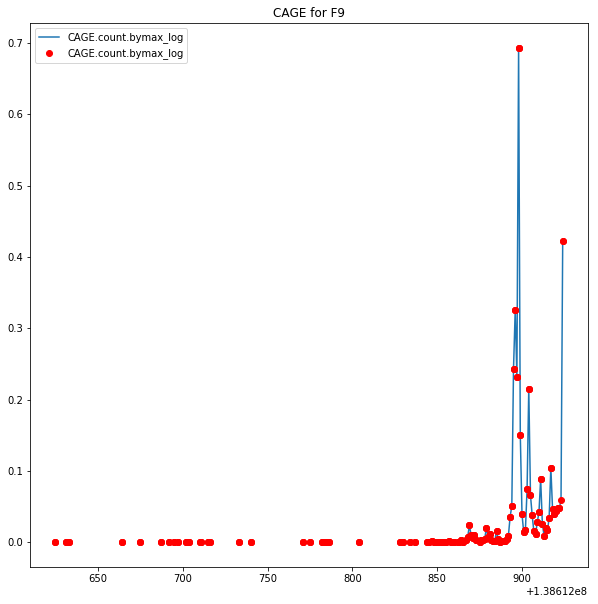

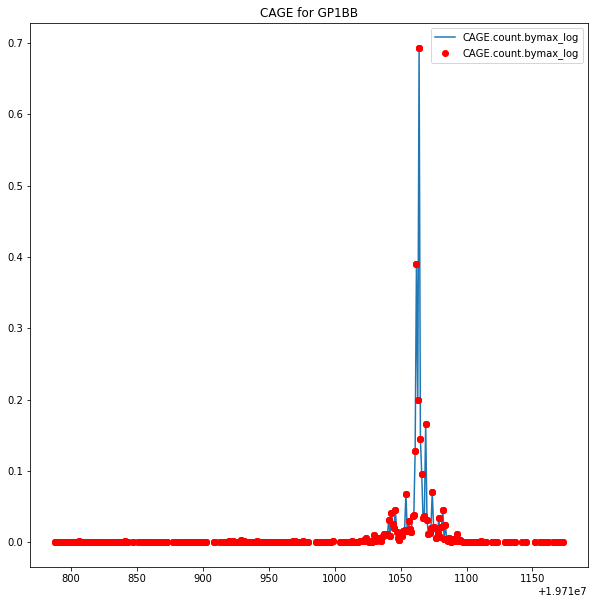

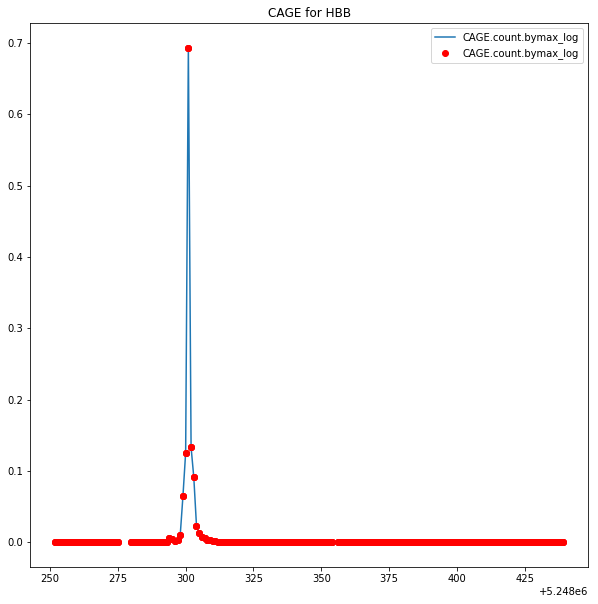

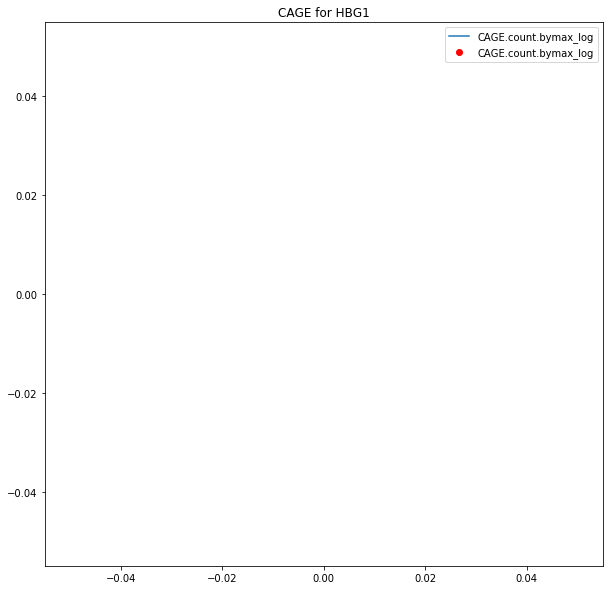

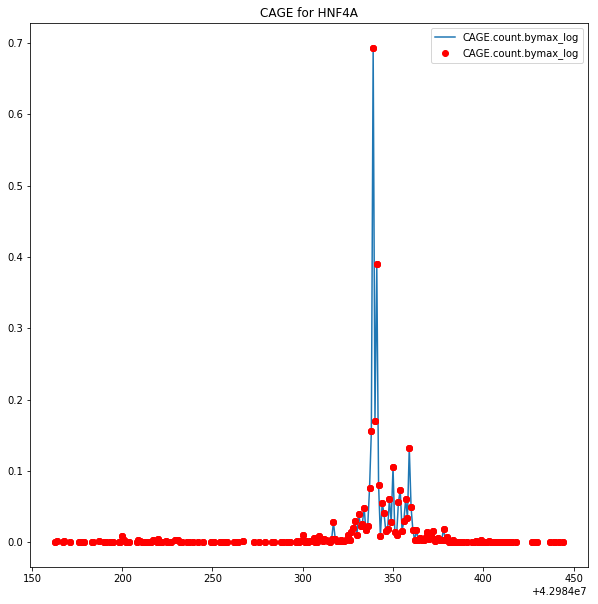

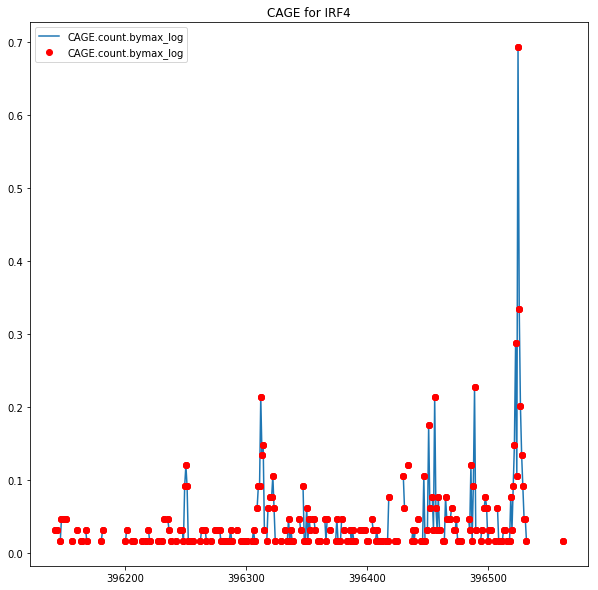

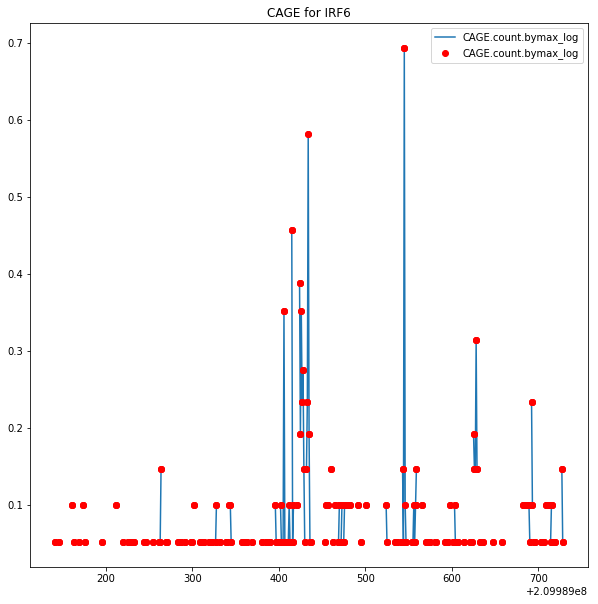

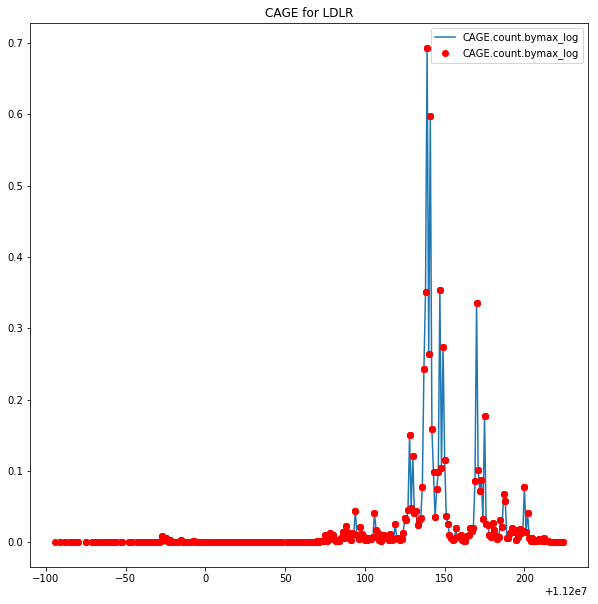

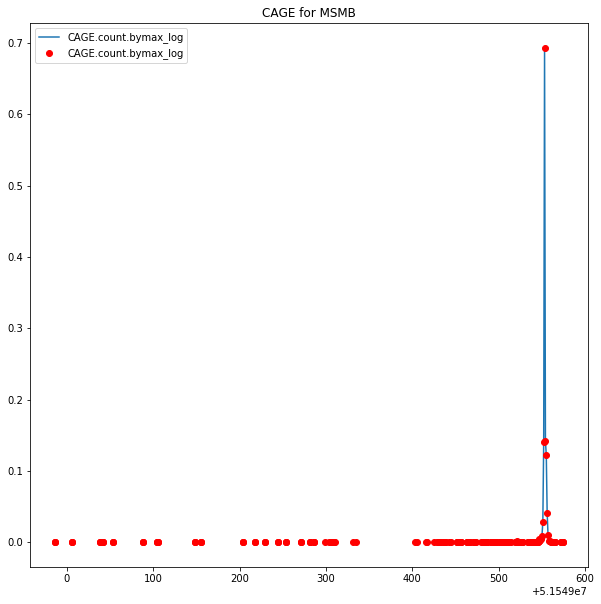

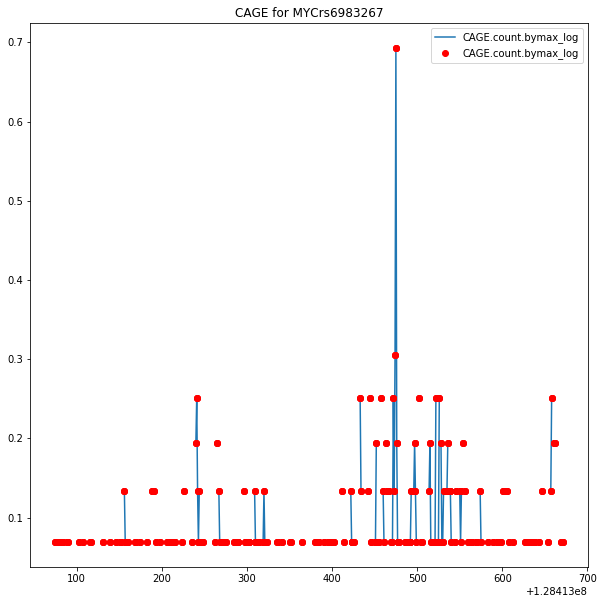

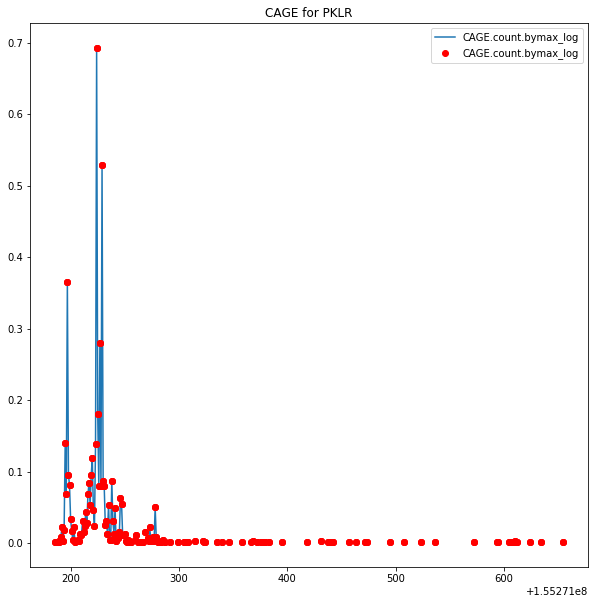

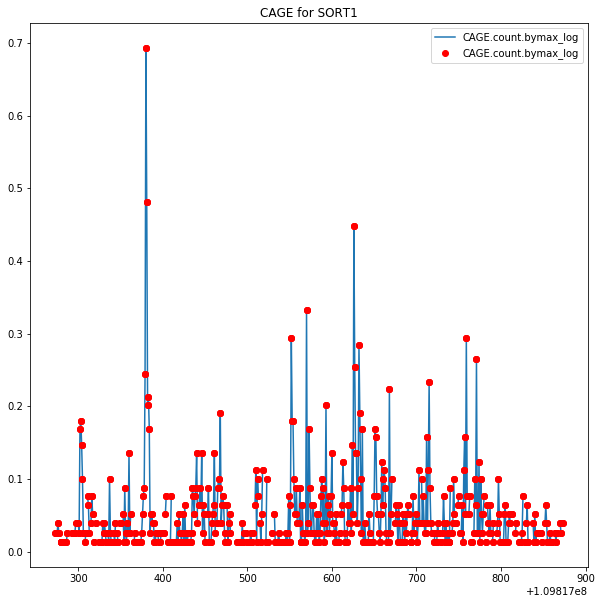

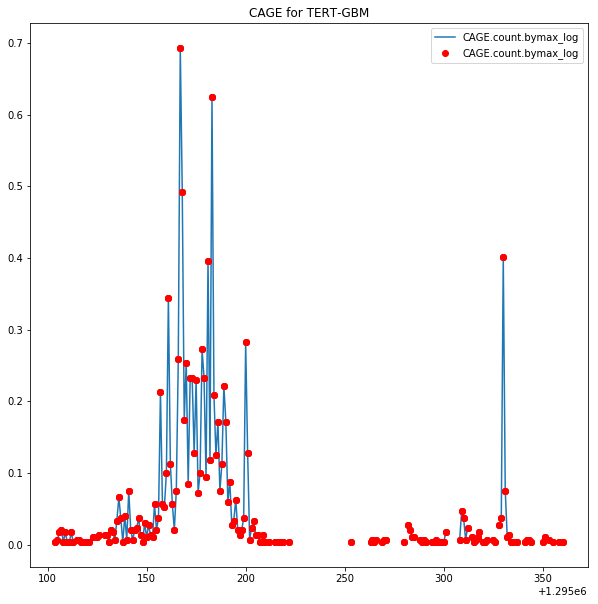

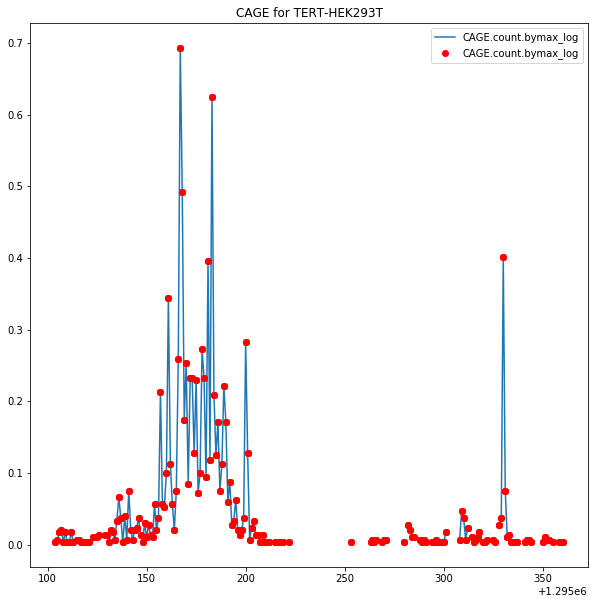

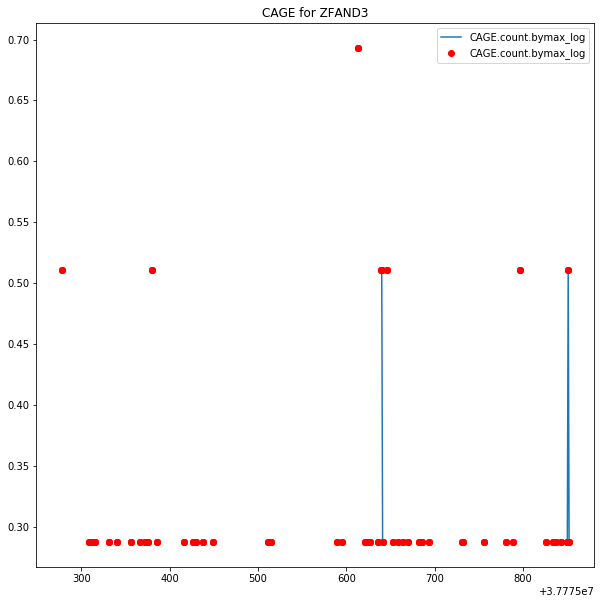

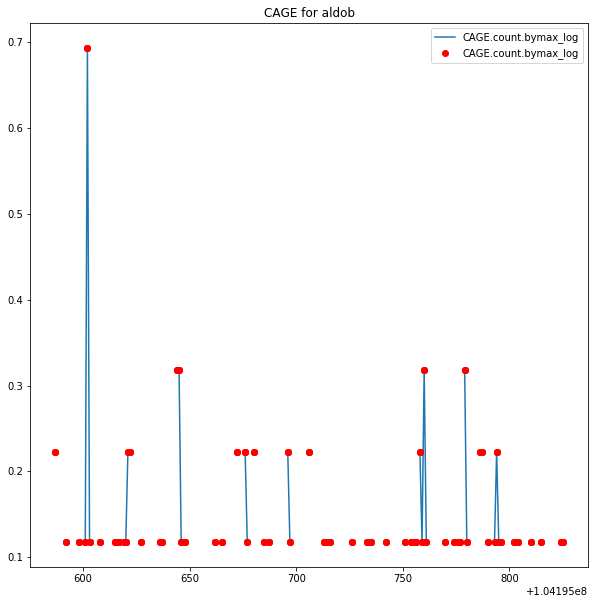

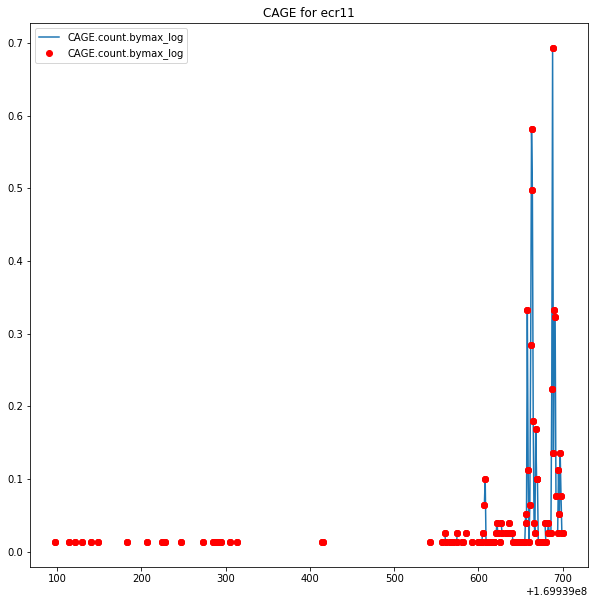

In [655]:
# Better to iterate over (tag score) not (score tag) ?
tags = all.tag.unique()

draw = True
save = True #False


for tag in tags:
    if not draw:
        break
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(all[all.tag == tag].Pos, all[all.tag == tag]["CAGE.count.bymax_log"])
    ax.plot(all[all.tag == tag].Pos, all[all.tag == tag]["CAGE.count.bymax_log"], 'ro')
    #ax.plot(all[all.tag == tag].Pos, all[all.tag == tag]["CAGE.dist2max_log"])
    plt.legend(loc='best')
    plt.title("CAGE for {}".format(tag))
    if save:
        plt.savefig("CAGE.pngs/CAGE_{}.png".format(tag))
    plt.show()


In [656]:
!mkdir -p dnase.pngs

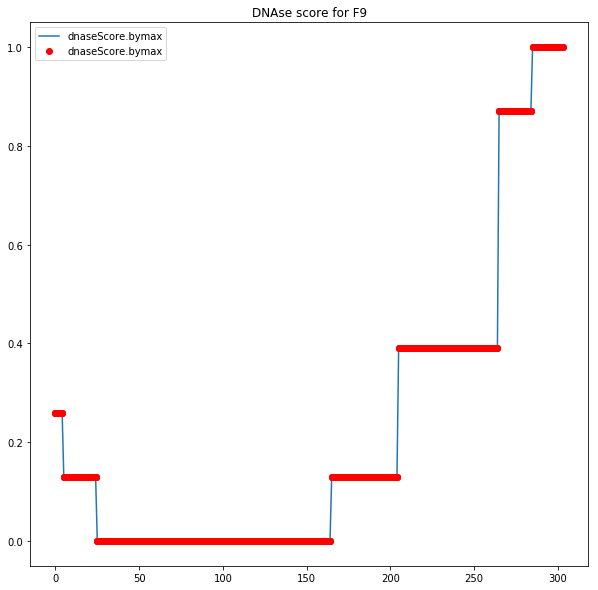

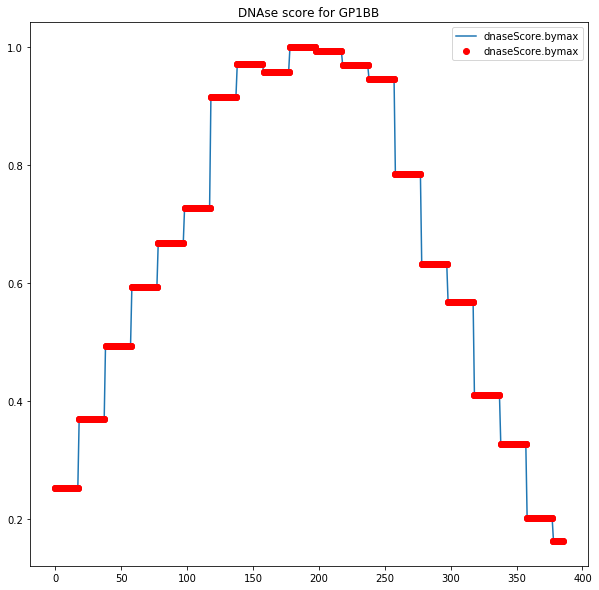

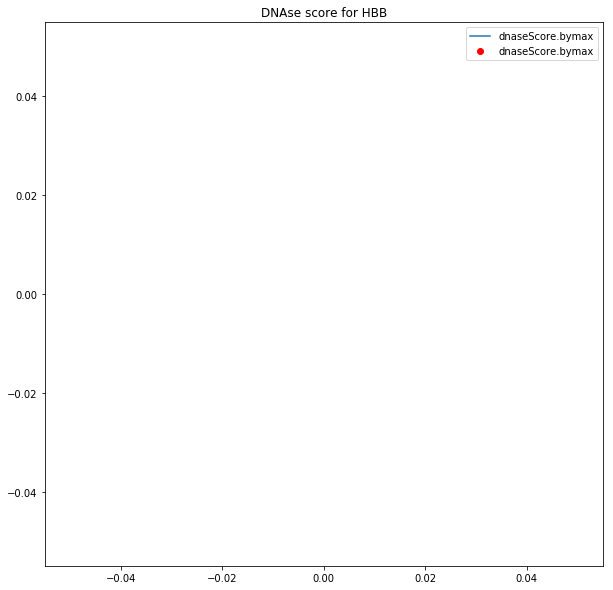

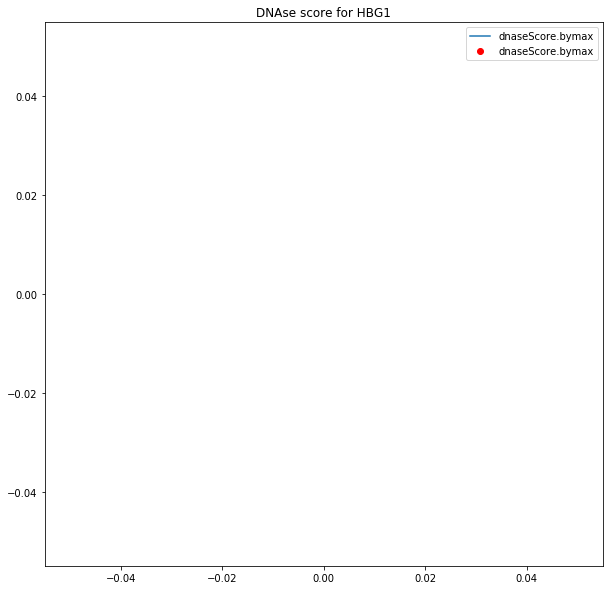

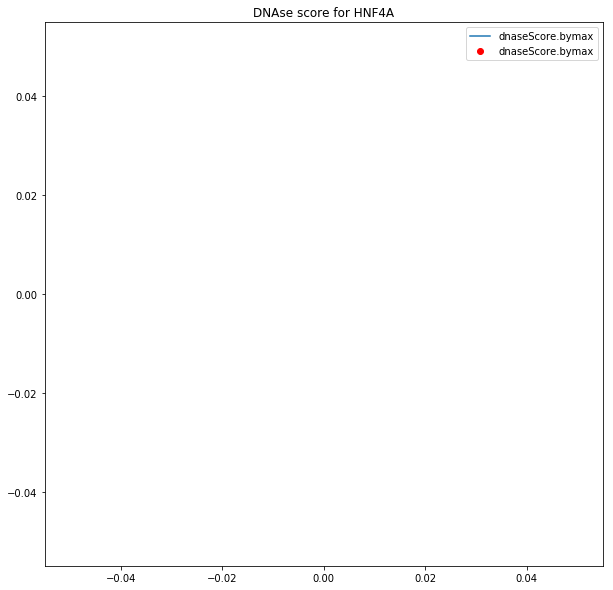

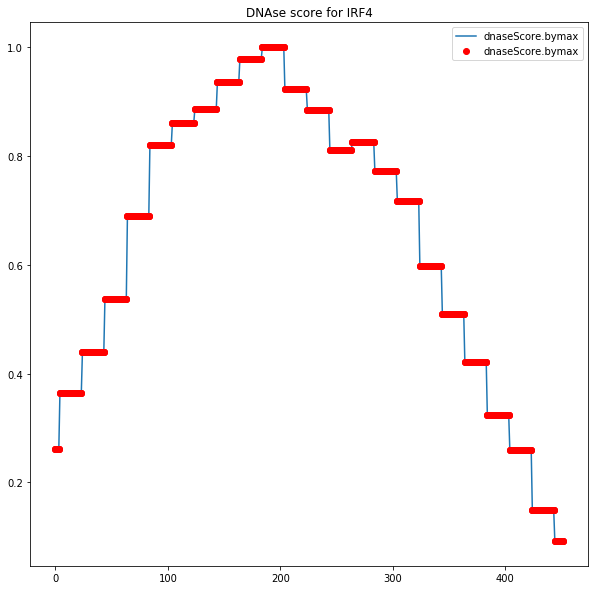

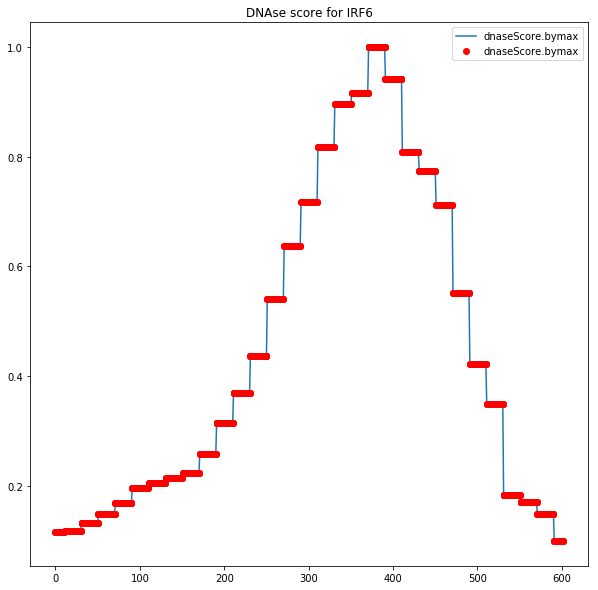

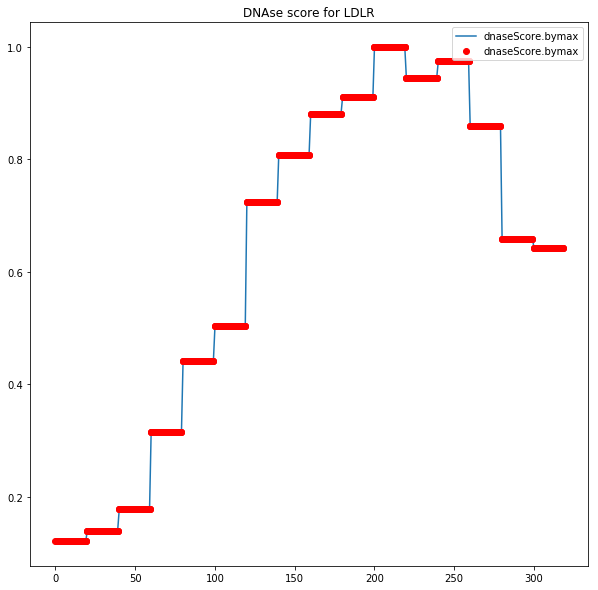

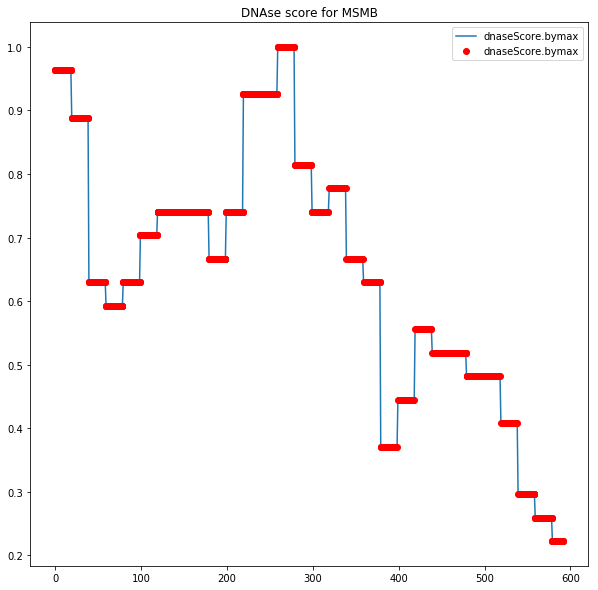

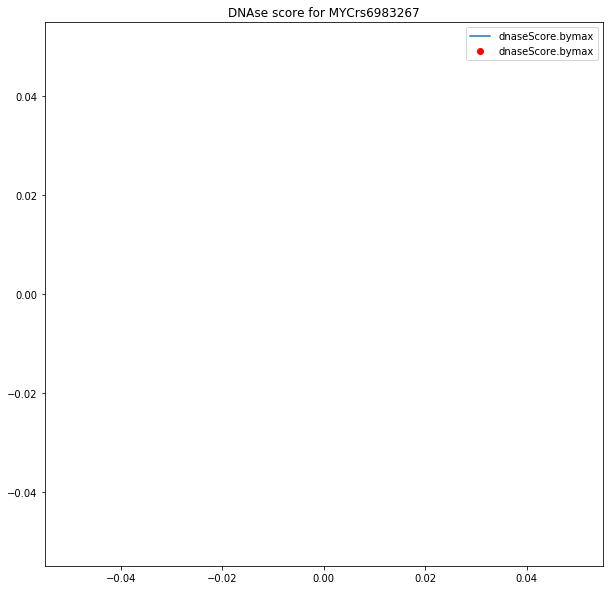

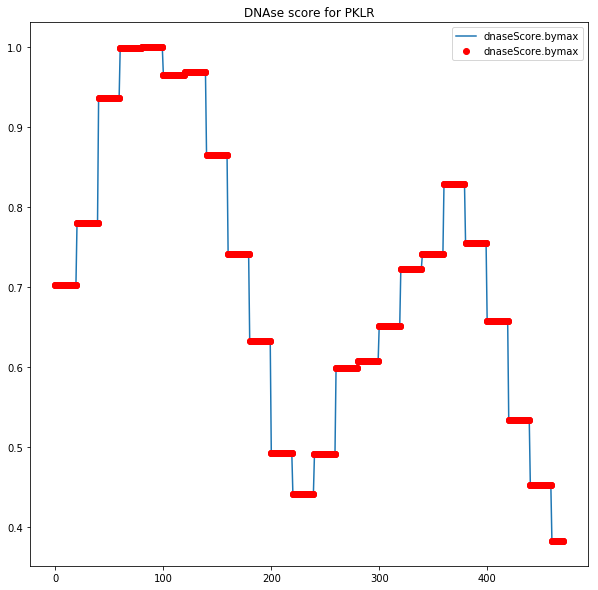

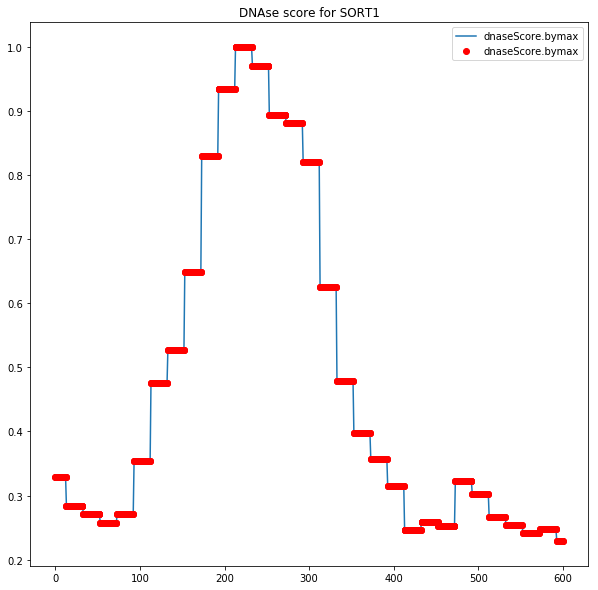

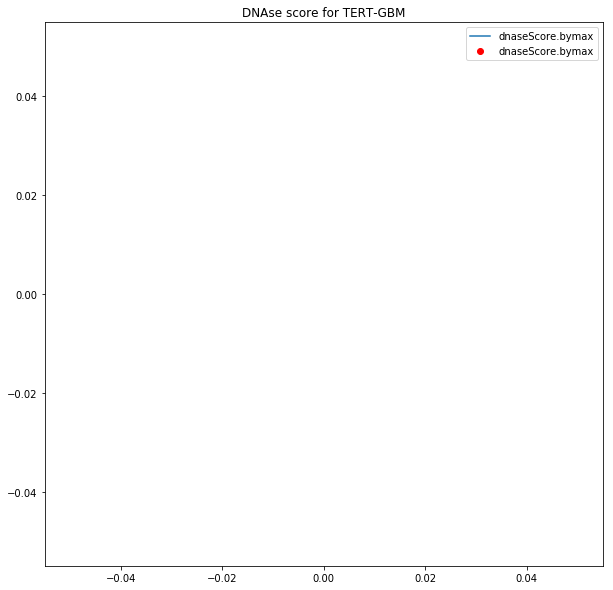

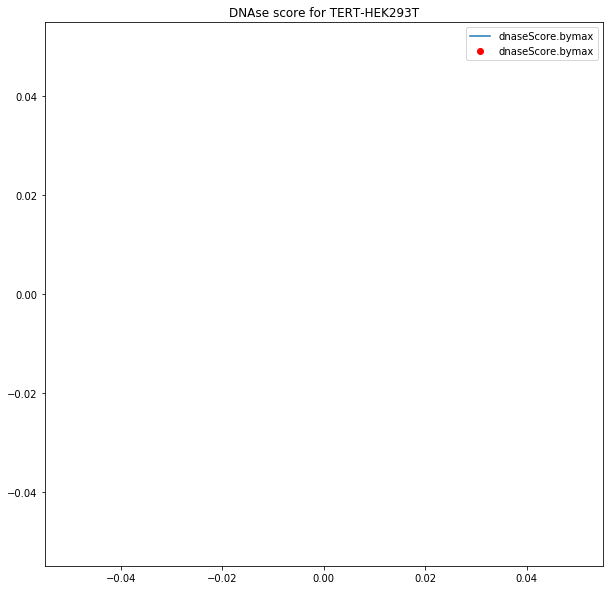

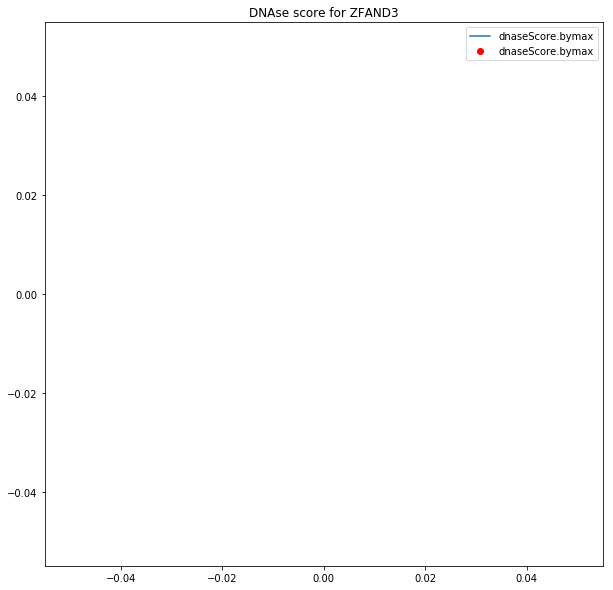

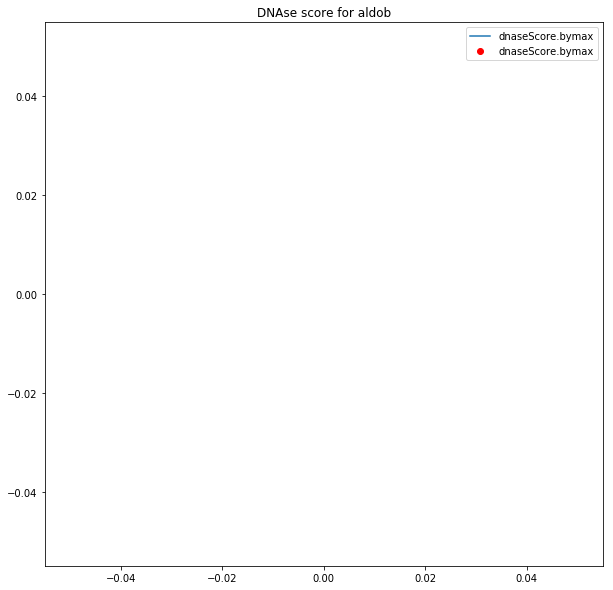

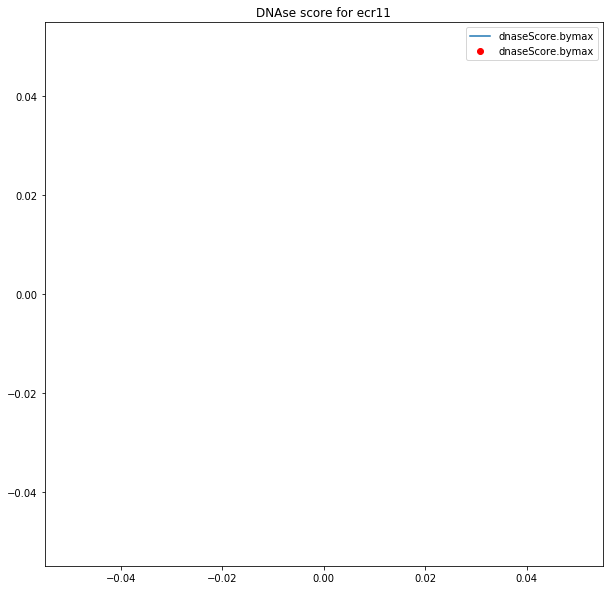

In [657]:
tags = all.tag.unique()

draw = True
save = True #False


#for tag in ["MSMB"]:#tags:
for tag in tags:
    if not draw:
        break
    fig, ax = plt.subplots(figsize=(10,10))
    slc = all[all.tag == tag][["Pos", "dnaseScore.bymax", "dnaseScore"]].drop_duplicates()
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["dnaseScore.bymax"])
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["dnaseScore.bymax"], 'ro')
    #ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.bymax"])
    #ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.bymax"], 'ro')
    #ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore"])
    #ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore"], 'ro')
    #ax.plot(slc.Pos, 'ro')

    plt.legend(loc='best')
    plt.title("DNAse score for {}".format(tag))
    if save:
        plt.savefig("dnase.pngs/dnase_{}.png".format(tag))
    plt.show()

In [658]:
!mkdir -p dnase.cons.pngs

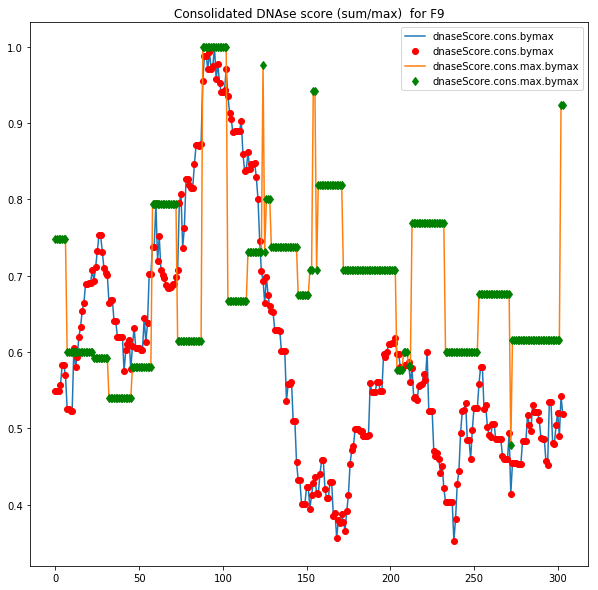

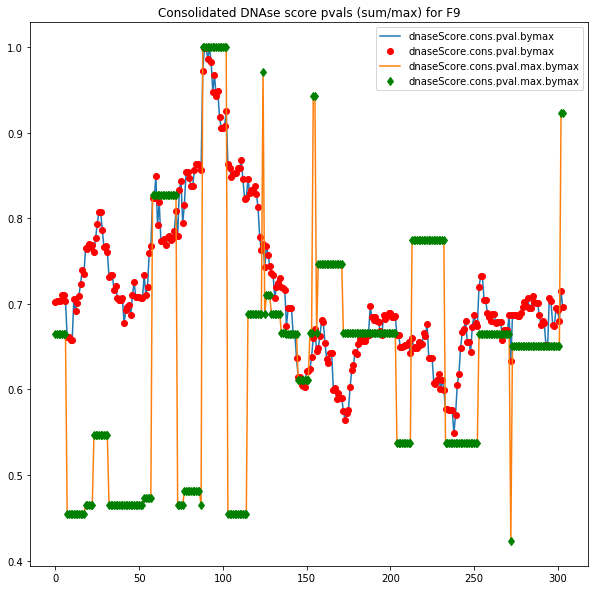

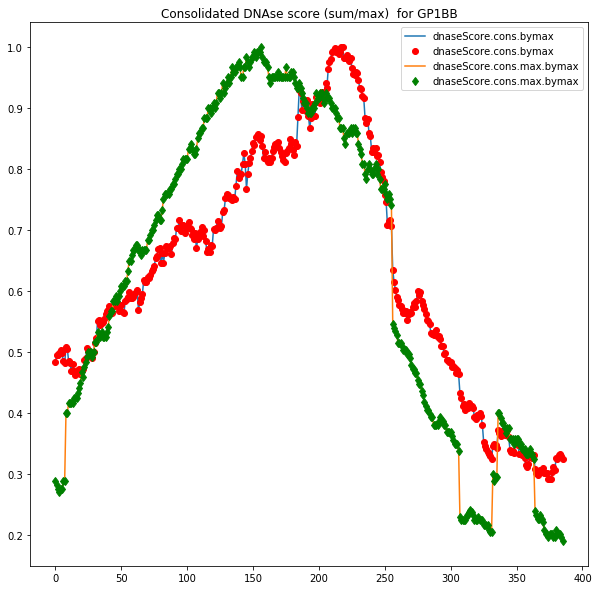

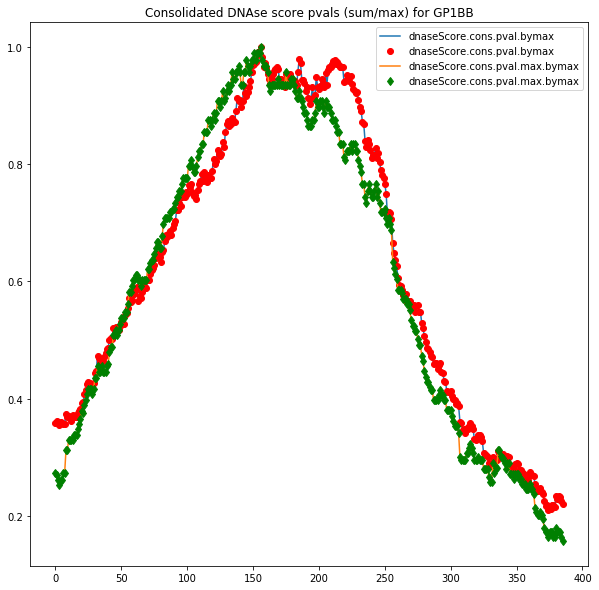

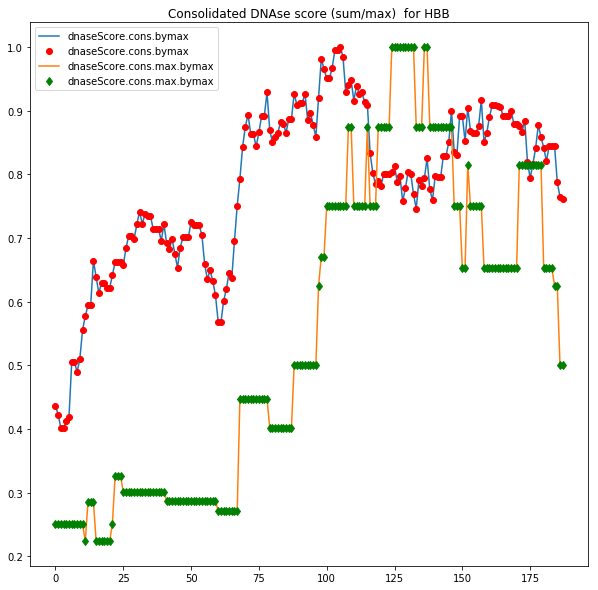

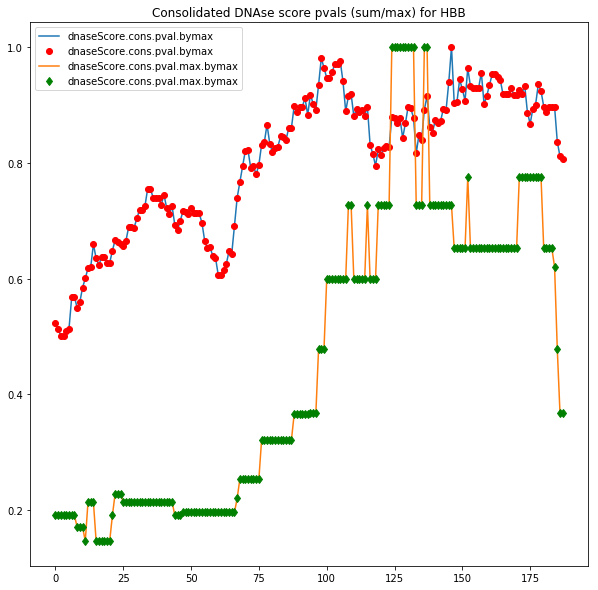

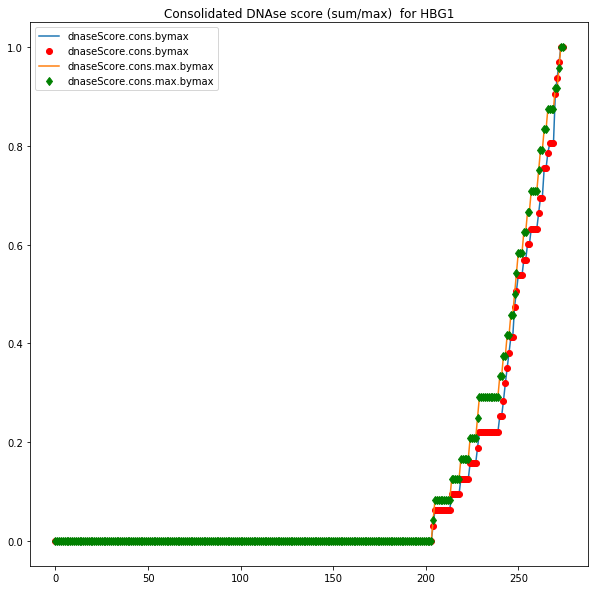

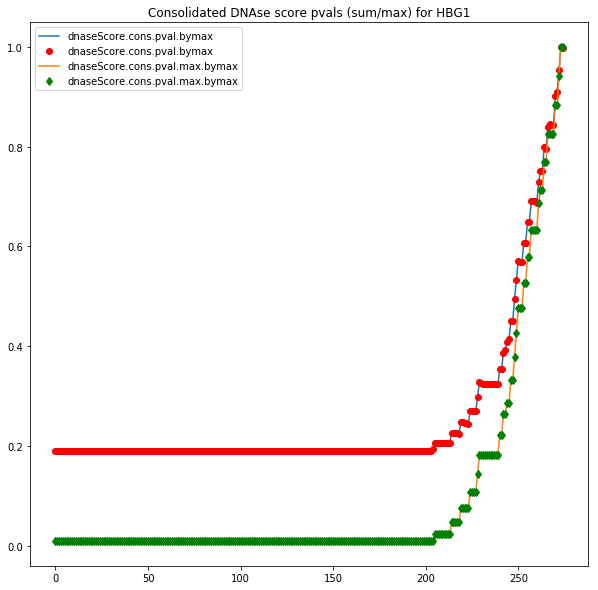

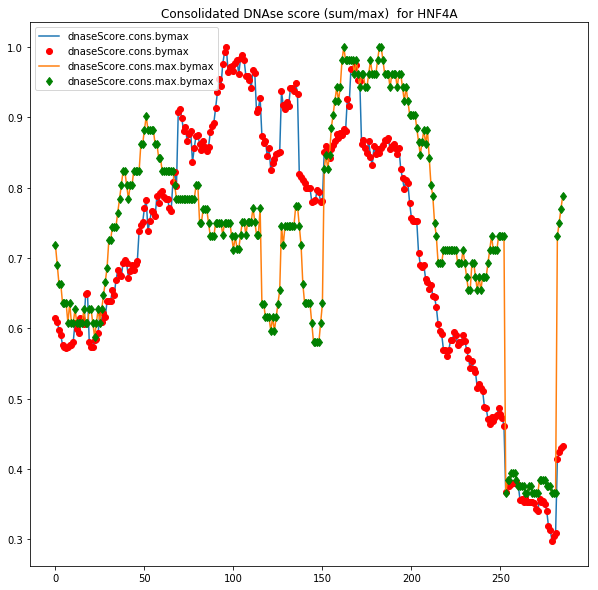

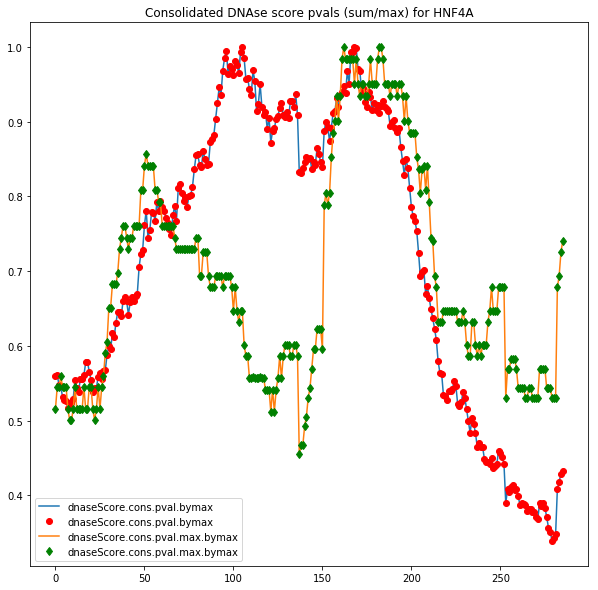

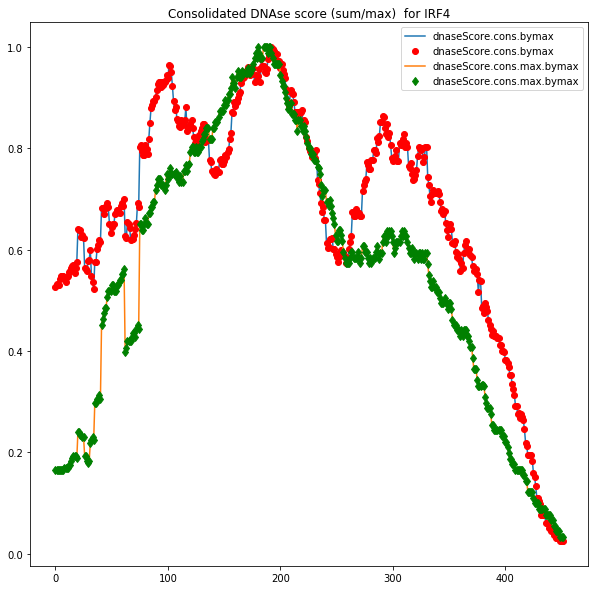

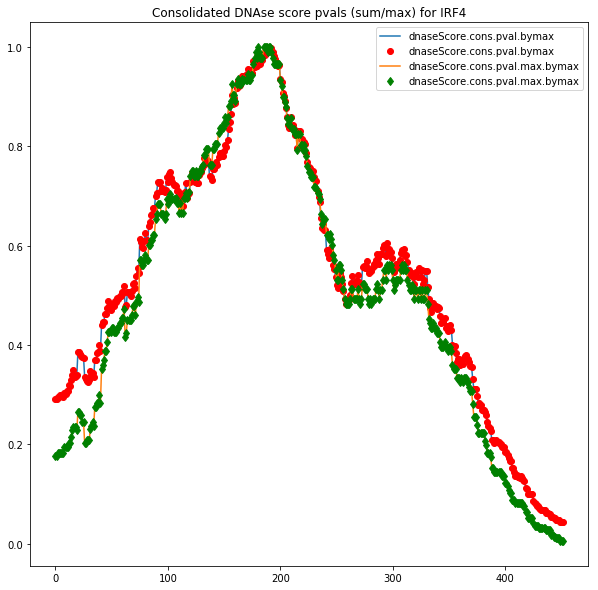

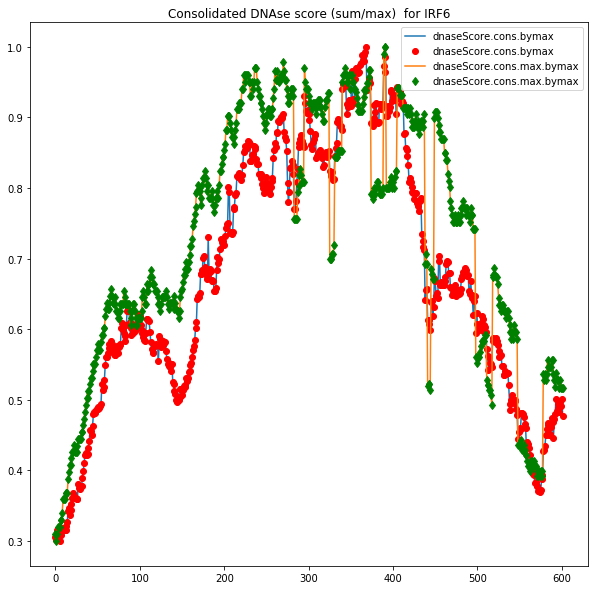

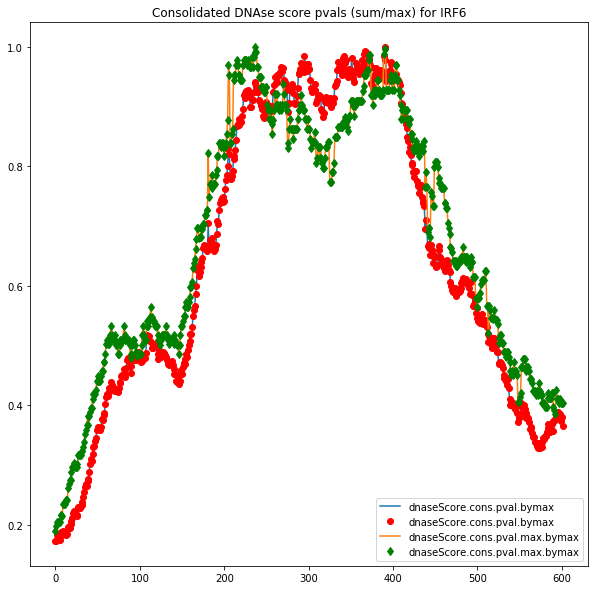

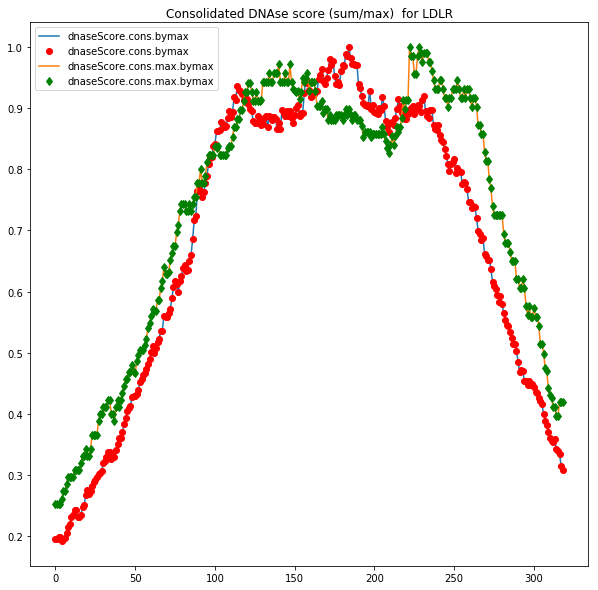

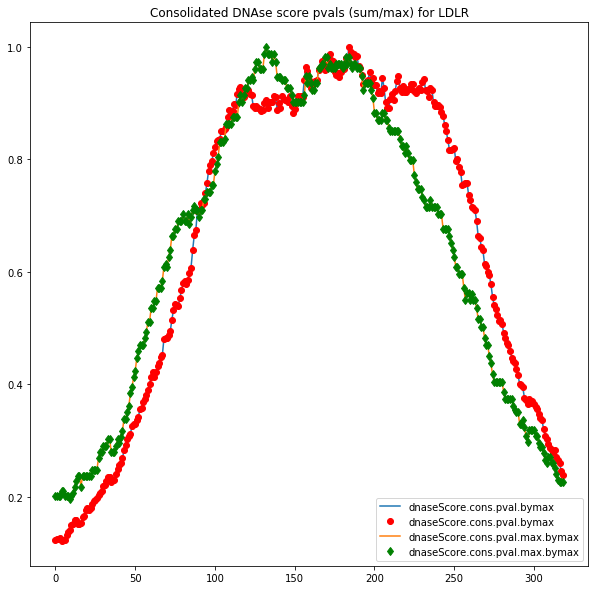

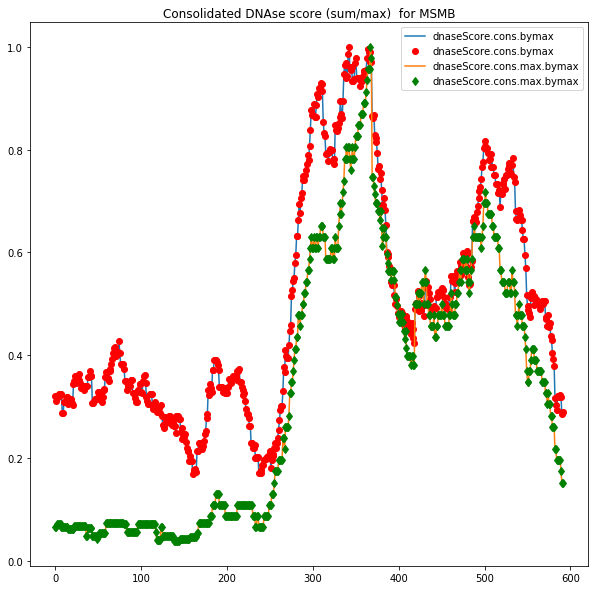

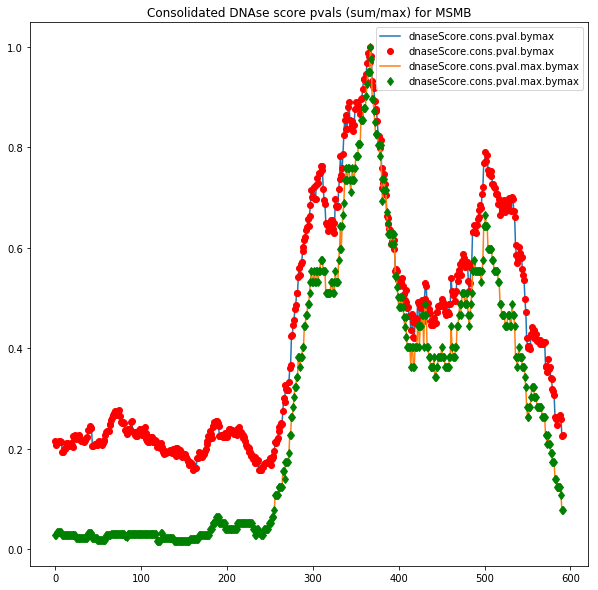

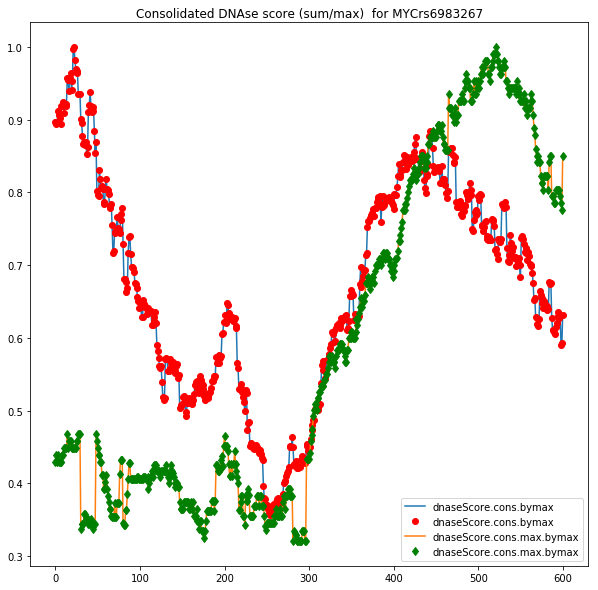

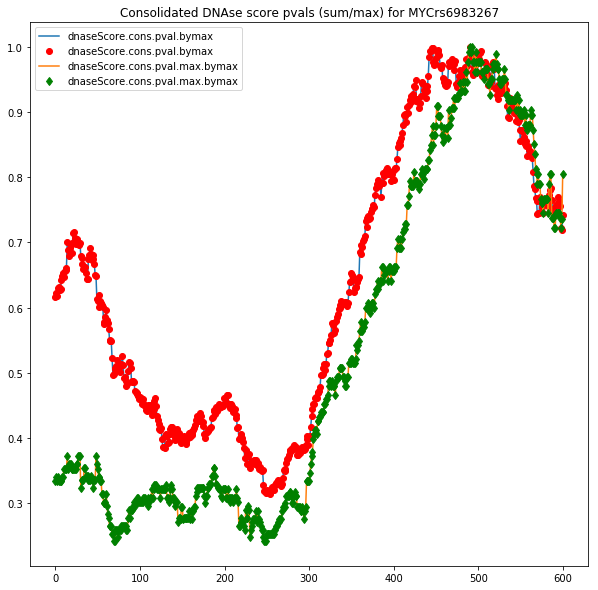

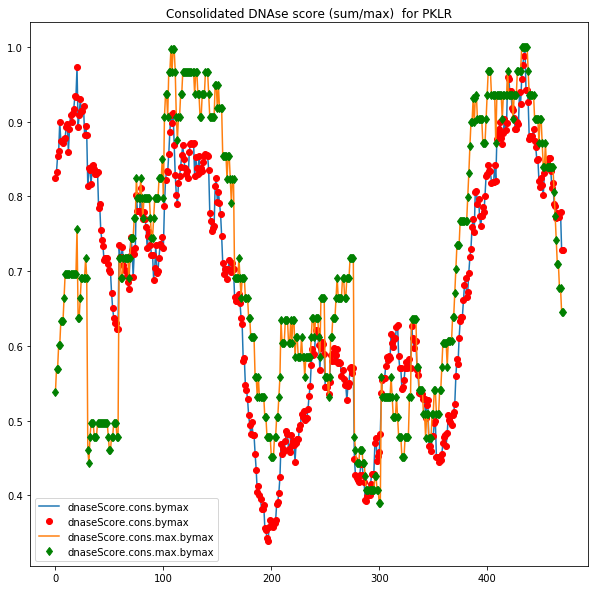

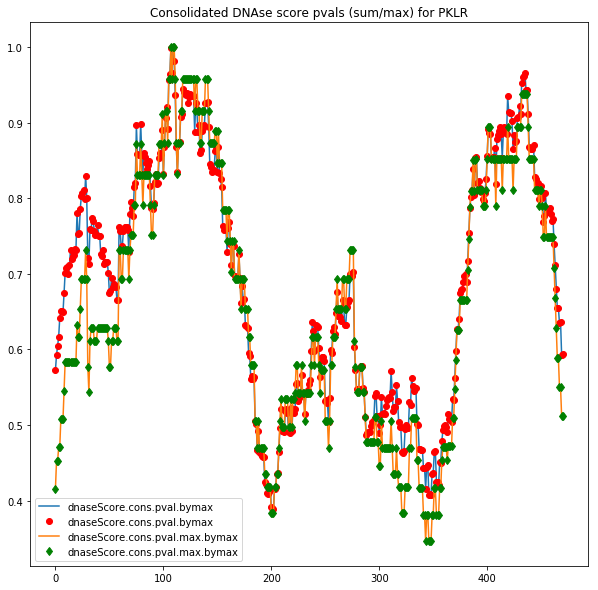

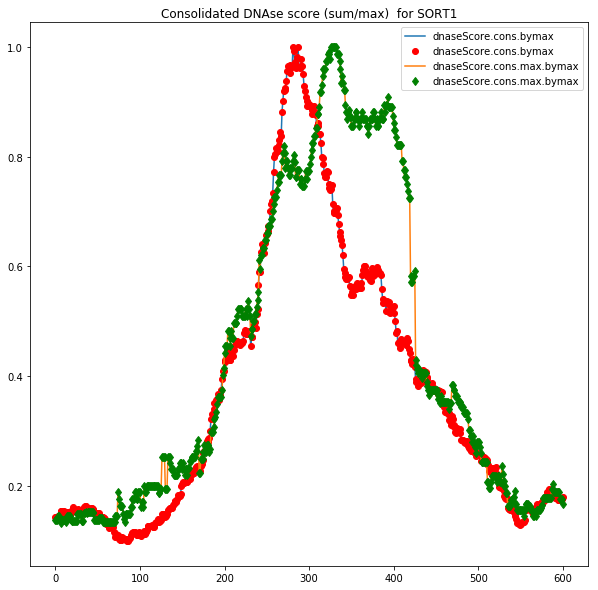

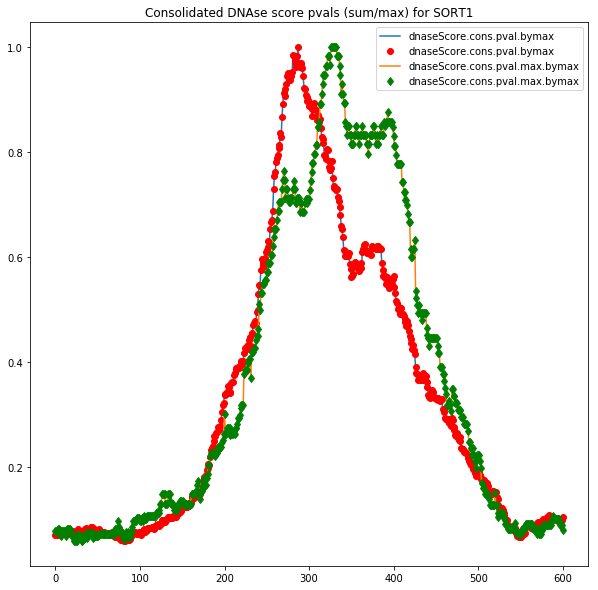

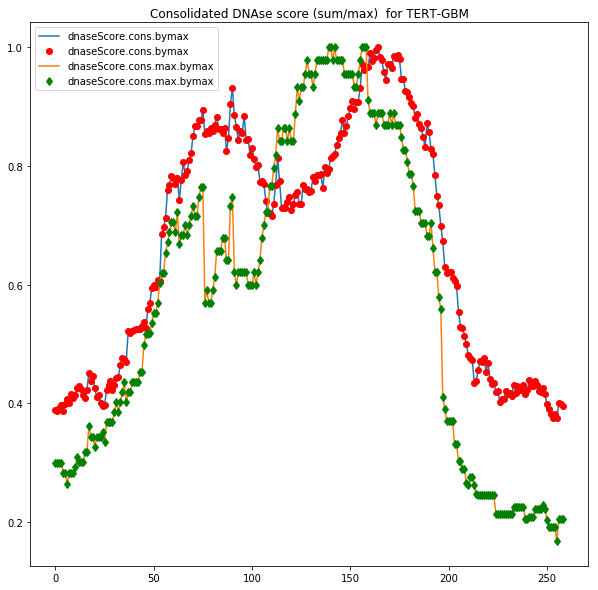

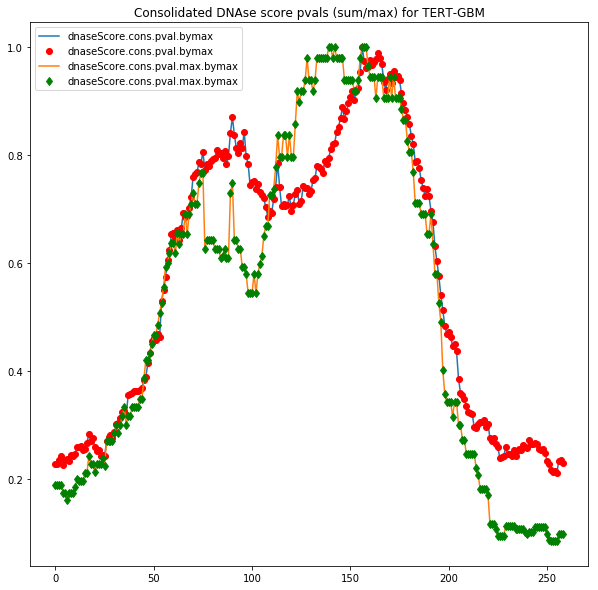

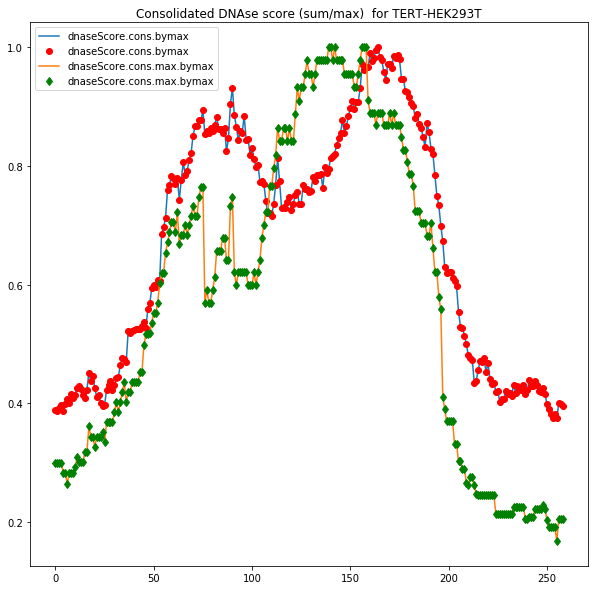

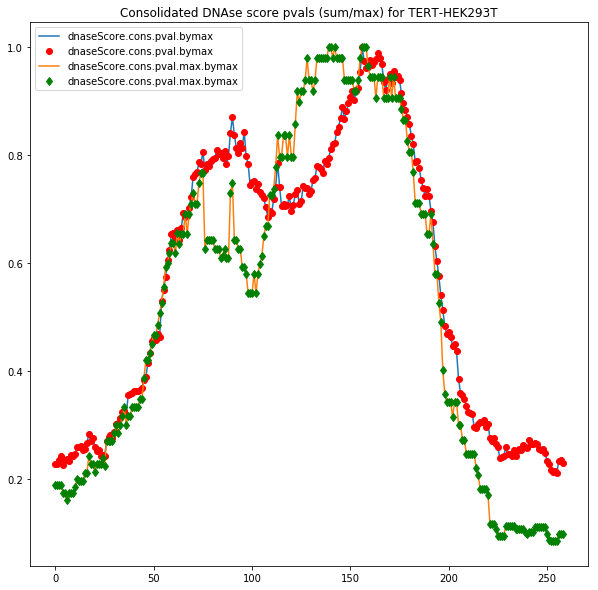

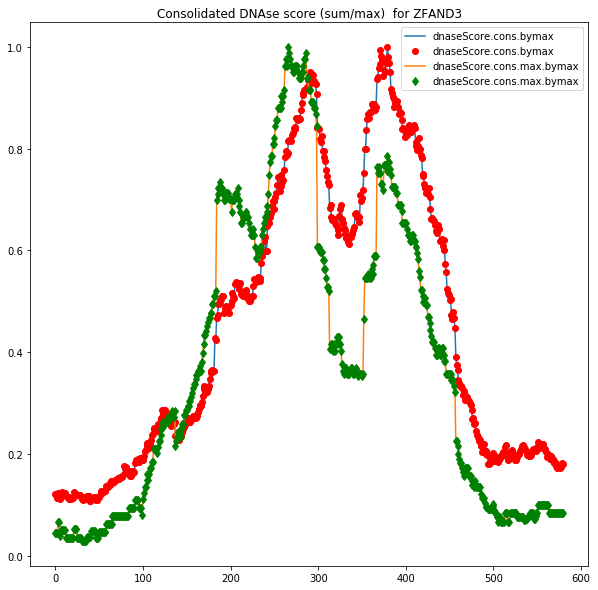

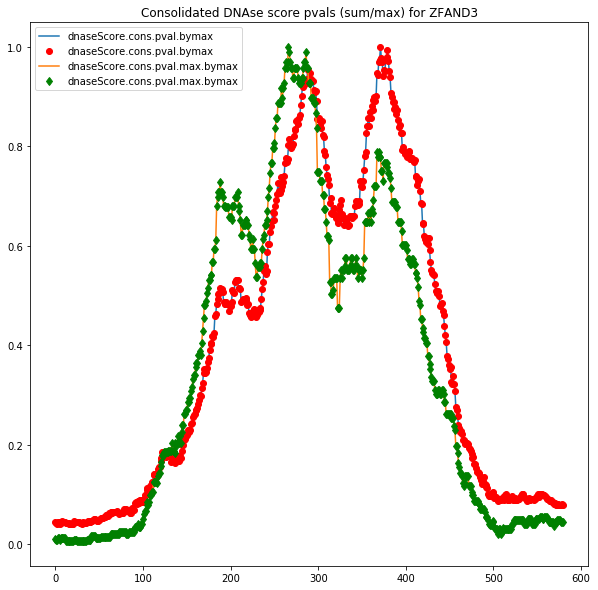

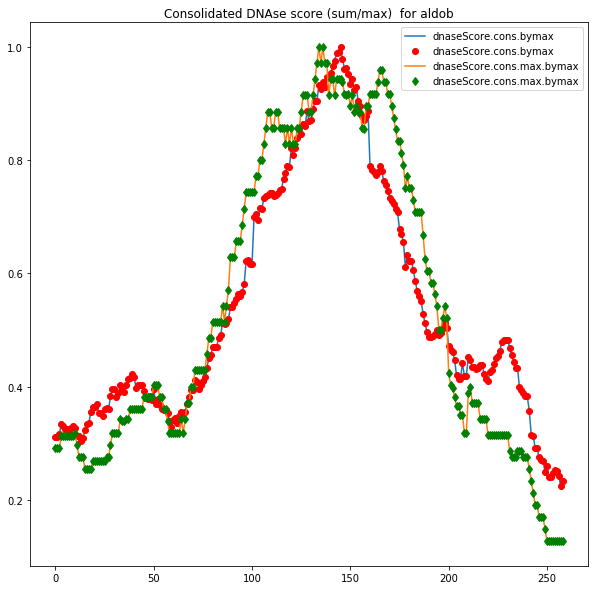

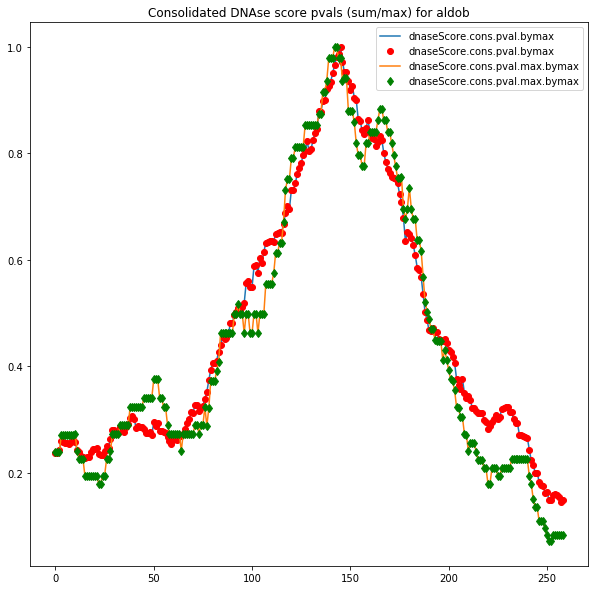

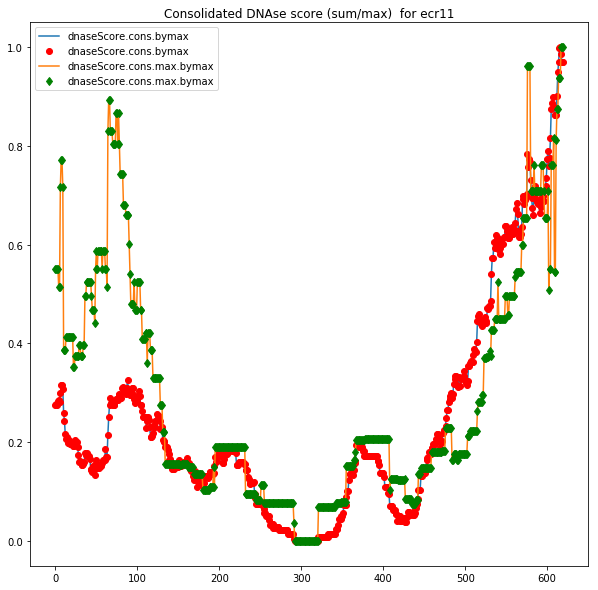

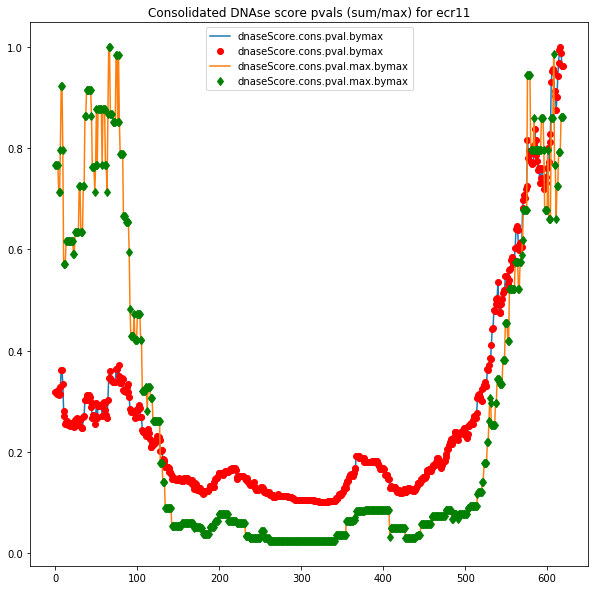

In [659]:
tags = all.tag.unique()

draw = True
save = True #False


#for tag in ["MSMB"]:#tags:
for tag in tags:
    if not draw:
        break
    slc = all[all.tag == tag][["Pos",  "dnaseScore.cons.bymax", "dnaseScore.cons.max.bymax", "dnaseScore.cons.pval.bymax", "dnaseScore.cons.pval.max.bymax"]].drop_duplicates()
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.bymax"])
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.bymax"], 'ro')
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.max.bymax"])
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.max.bymax"], 'gd')
    plt.legend(loc='best')
    plt.title("Consolidated DNAse score (sum/max)  for {}".format(tag))
    if save:
        plt.savefig("dnase.cons.pngs/dnase_cons_{}.sum_max.png".format(tag))
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.pval.bymax"])
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.pval.bymax"], 'ro')
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.pval.max.bymax"])
    ax.plot(slc.Pos - slc.Pos.min(), slc["dnaseScore.cons.pval.max.bymax"], 'gd')
    plt.legend(loc='best')
    plt.title("Consolidated DNAse score pvals (sum/max) for {}".format(tag))
    if save:
        plt.savefig("dnase.cons.pngs/dnase_cons_{}.pval.sum_max.png".format(tag))
    plt.show()
    
    
    

In [660]:
all[all.tag == "MSMB"][["Pos", "dnaseScore", "dnaseScore.bymax"]].drop_duplicates().to_csv("msmb.raw.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")

In [661]:
used_pos_stats = all.groupby(["tag","#Chrom"]).Pos.agg(["min", "max","count", lambda x: x.unique().shape[0]]).rename(columns={"<lambda>":"uniq"})
used_pos_stats["len"] = used_pos_stats["max"] - used_pos_stats["min"] + 1
used_pos_stats.reset_index(inplace=True)
used_pos_stats = used_pos_stats[used_pos_stats.columns[0:]].sort_values(by=["#Chrom","min","max"])
used_pos_stats

tag #Chrom        min        max  count  uniq  len
11         SORT1      1  109817273  109817873   1790   601  601
10          PKLR      1  155271186  155271656   1409   471  471
6           IRF6      1  209989135  209989736   1786   602  602
8           MSMB     10   51548987   51549578   1358   592  592
2            HBB     11    5248252    5248439    564   188  188
3           HBG1     11    5271035    5271309    825   275  275
7           LDLR     19   11199906   11200224    955   319  319
16         ecr11      2  169939082  169939701   1860   620  620
4          HNF4A     20   42984159   42984444    858   286  286
1          GP1BB     22   19710788   19711173   1157   386  386
12      TERT-GBM      5    1295104    1295362    775   259  259
13  TERT-HEK293T      5    1295104    1295362    775   259  259
5           IRF4      6     396142     396593   1356   452  452
14        ZFAND3      6   37775274   37775853   1738   580  580
9   MYCrs6983267      8  128413073  128413673   1792   601  601
15         aldob      9  104195570  104195828    777   259  259
0             F9      X  138612621  138612924    907   304  304

In [662]:
all.groupby("tag").dnaseScore.max()

tag
F9               0.045542
GP1BB           54.424200
HBB                   NaN
HBG1                  NaN
HNF4A                 NaN
IRF4            43.011970
IRF6            11.781136
LDLR             6.421600
MSMB             0.131847
MYCrs6983267          NaN
PKLR             5.288680
SORT1            9.963120
TERT-GBM              NaN
TERT-HEK293T          NaN
ZFAND3                NaN
aldob                 NaN
ecr11                 NaN
Name: dnaseScore, dtype: float64

In [663]:
#!mkdir -p pooledCAGE.pngs

In [664]:
"""
# Better to iterate over (tag score) not (score tag) ?
tags = all.tag.unique()

draw = True
save = True #False


for tag in tags:
    if not draw:
        break
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min() , all[all.tag == tag]["CAGE.pooled.count.log"], '-g')
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled.count.log"], 'ro')
    #ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled.count.dist2max"]/200, label = " to max / 200")
    plt.legend(loc='best')
    plt.title("CAGE for {}".format(tag))
    if save:
        plt.savefig("pooledCAGE.log.pngs/CAGE_{}.png".format(tag))
    plt.show()
"""


'\n# Better to iterate over (tag score) not (score tag) ?\ntags = all.tag.unique()\n\ndraw = True\nsave = True #False\n\n\nfor tag in tags:\n    if not draw:\n        break\n    fig, ax = plt.subplots(figsize=(10,10))\n    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min() , all[all.tag == tag]["CAGE.pooled.count.log"], \'-g\')\n    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled.count.log"], \'ro\')\n    #ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled.count.dist2max"]/200, label = " to max / 200")\n    plt.legend(loc=\'best\')\n    plt.title("CAGE for {}".format(tag))\n    if save:\n        plt.savefig("pooledCAGE.log.pngs/CAGE_{}.png".format(tag))\n    plt.show()\n'

In [665]:
#!mkdir -p pooledCAGE_raw.pngs

In [666]:
"""
# Better to iterate over (tag score) not (score tag) ?
tags = all.tag.unique()

draw = True
save = True #False


for tag in tags:
    if not draw:
        break
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min() , all[all.tag == tag]["CAGE.pooled_raw.count"], label = tag)
    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled_raw.count"], 'ro', label = tag)
    plt.legend(loc='best')
    plt.title("CAGE for {}".format(tag))
    if save:
        plt.savefig("pooledCAGE_raw.pngs/CAGE_{}.png".format(tag))
    plt.show()

"""

'\n# Better to iterate over (tag score) not (score tag) ?\ntags = all.tag.unique()\n\ndraw = True\nsave = True #False\n\n\nfor tag in tags:\n    if not draw:\n        break\n    fig, ax = plt.subplots(figsize=(10,10))\n    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min() , all[all.tag == tag]["CAGE.pooled_raw.count"], label = tag)\n    ax.plot(all[all.tag == tag].Pos - all[all.tag == tag].Pos.min(), all[all.tag == tag]["CAGE.pooled_raw.count"], \'ro\', label = tag)\n    plt.legend(loc=\'best\')\n    plt.title("CAGE for {}".format(tag))\n    if save:\n        plt.savefig("pooledCAGE_raw.pngs/CAGE_{}.png".format(tag))\n    plt.show()\n\n'

In [667]:
#all.groupby("tag").plot.scatter(y="Confidence", x =  "Value")


In [668]:


all.loc[np.isnan(all["CAGE.count"]), "CAGE.dist2max_log"] = -1
all.loc[np.isnan(all["CAGE.count"]), "CAGE.count.bymax_log"] = -1
all.loc[np.isnan(all["CAGE.count"]), "CAGE.count"] = -1

all.loc[np.isnan(all["dnaseScore"]), "dnaseScore"] = -1
all.loc[np.isnan(all["dnaseScore.bymax"]), "dnaseScore.bymax"] = -1


In [669]:
#bic_data_df = all.drop("#Chrom Pos Ref Alt tag Ref.hg19.75 Ref_matched mz46_pre mz100_pre Value Confidence".split(" "), axis = 1)
bic_data_df = all["mz100_log_diff gerp_rs phyloP100way phastCons100way".split(" ")]

bic_data = bic_data_df.as_matrix()

In [670]:
pre_cor = all.drop("#Chrom Pos Ref Alt Ref.hg19.75 Ref_matched mz46_pre mz100_pre".split(" "), axis = 1)

In [671]:
"NOT UNIQUE (CHR POS): influences mean, corr, etc... "

'NOT UNIQUE (CHR POS): influences mean, corr, etc... '

In [672]:
pre_cor.drop('tag', axis=1).corr(method="spearman")

Value  Confidence   gerp_rs  phyloP100way  \
Value                           1.000000   -0.244262 -0.096831     -0.106502   
Confidence                     -0.244262    1.000000  0.099533      0.087806   
gerp_rs                        -0.096831    0.099533  1.000000      0.783606   
phyloP100way                   -0.106502    0.087806  0.783606      1.000000   
phyloP46way                    -0.046056    0.069861  0.555005      0.447585   
phastCons46way                 -0.034806    0.091478  0.535951      0.513031   
phastCons100way                -0.106004    0.083830  0.692804      0.805425   
mz46_log_diff                   0.084952   -0.072899 -0.690856     -0.578560   
mz100_log_diff                  0.090691   -0.062405 -0.559606     -0.637060   
mz46_log_diff.hg19.75           0.084729   -0.071723 -0.691489     -0.578884   
mz100_log_diff.hg19.75          0.090492   -0.061294 -0.560036     -0.637377   
CAGE.count                      0.002100    0.155621  0.036180      0.031966   
CAGE.dist2max_log              -0.014135    0.152780  0.053639      0.057082   
CAGE.count.bymax_log           -0.015213    0.153186  0.061646      0.063726   
dnaseScore                      0.024417    0.209767 -0.021635     -0.009817   
dnaseScore.cons                -0.092172    0.220352  0.246209      0.227725   
dnaseScore.cons.max            -0.092369    0.230449  0.243390      0.233514   
dnaseScore.cons.pval           -0.079949    0.239838  0.252562      0.236980   
dnaseScore.cons.pval.max       -0.063685    0.220745  0.237505      0.226734   
dnaseScore.bymax                0.018971    0.215964 -0.043829     -0.036882   
dnaseScore.cons.bymax          -0.112312    0.324194  0.149161      0.112020   
dnaseScore.cons.max.bymax      -0.099836    0.279004  0.184035      0.161945   
dnaseScore.cons.pval.bymax     -0.101027    0.299639  0.178508      0.143690   
dnaseScore.cons.pval.max.bymax -0.082586    0.248170  0.193335      0.170693   

                                phyloP46way  phastCons46way  phastCons100way  \
Value                             -0.046056       -0.034806        -0.106004   
Confidence                         0.069861        0.091478         0.083830   
gerp_rs                            0.555005        0.535951         0.692804   
phyloP100way                       0.447585        0.513031         0.805425   
phyloP46way                        1.000000        0.481686         0.403559   
phastCons46way                     0.481686        1.000000         0.645196   
phastCons100way                    0.403559        0.645196         1.000000   
mz46_log_diff                     -0.458091       -0.415500        -0.506118   
mz100_log_diff                    -0.381323       -0.374116        -0.524297   
mz46_log_diff.hg19.75             -0.458173       -0.415389        -0.505911   
mz100_log_diff.hg19.75            -0.381258       -0.373862        -0.524045   
CAGE.count                         0.033340        0.016861         0.013956   
CAGE.dist2max_log                  0.041886        0.054521         0.047836   
CAGE.count.bymax_log               0.041056        0.065103         0.059416   
dnaseScore                        -0.006451       -0.055150        -0.040715   
dnaseScore.cons                    0.241415        0.273948         0.280650   
dnaseScore.cons.max                0.249710        0.286257         0.271530   
dnaseScore.cons.pval               0.244644        0.298263         0.293352   
dnaseScore.cons.pval.max           0.231495        0.296899         0.272338   
dnaseScore.bymax                  -0.013330       -0.099494        -0.082007   
dnaseScore.cons.bymax              0.163656        0.130386         0.096729   
dnaseScore.cons.max.bymax          0.173552        0.180565         0.174536   
dnaseScore.cons.pval.bymax         0.183774        0.192255         0.135703   
dnaseScore.cons.pval.max.bymax     0.177734        0.209673         0.188931   

                                m

In [673]:
pre_cor.tag.unique()

array(['F9', 'GP1BB', 'HBB', 'HBG1', 'HNF4A', 'IRF4', 'IRF6', 'LDLR',
       'MSMB', 'MYCrs6983267', 'PKLR', 'SORT1', 'TERT-GBM',
       'TERT-HEK293T', 'ZFAND3', 'aldob', 'ecr11'], dtype=object)

In [674]:
max_rows = pd.options.display.max_rows
max_rows

60

In [675]:
pd.set_option('display.max_rows', 10000)
pre_cor.groupby("tag").apply(lambda x: x.drop('tag', axis=1).drop_duplicates().corr(method="spearman"))

Value  Confidence   gerp_rs  \
tag                                                                           
F9           Value                           1.000000    0.226189  0.031293   
             Confidence                      0.226189    1.000000  0.004376   
             gerp_rs                         0.031293    0.004376  1.000000   
             phyloP100way                    0.009048   -0.087064  0.709160   
             phyloP46way                    -0.088514   -0.079827  0.365729   
             phastCons46way                  0.072324   -0.181795  0.546659   
             phastCons100way                 0.018829   -0.105435  0.645673   
             mz46_log_diff                  -0.012267    0.062693 -0.620045   
             mz100_log_diff                  0.074154    0.094326 -0.382972   
             mz46_log_diff.hg19.75          -0.012267    0.062693 -0.620224   
             mz100_log_diff.hg19.75          0.074154    0.094326 -0.382893   
             CAGE.count                      0.025164   -0.110903  0.239893   
             CAGE.dist2max_log               0.016948   -0.078576  0.200371   
             CAGE.count.bymax_log            0.025164   -0.110903  0.239893   
             dnaseScore                      0.010231   -0.100056  0.339933   
             dnaseScore.cons                -0.043789    0.202057 -0.295620   
             dnaseScore.cons.max             0.093299   -0.216542  0.060737   
             dnaseScore.cons.pval           -0.029086    0.191724 -0.297416   
             dnaseScore.cons.pval.max        0.092015   -0.191212  0.095801   
             dnaseScore.bymax                0.010231   -0.100056  0.339933   
             dnaseScore.cons.bymax          -0.043789    0.202057 -0.295620   
             dnaseScore.cons.max.bymax       0.093299   -0.216542  0.060737   
             dnaseScore.cons.pval.bymax     -0.029086    0.191724 -0.297416   
             dnaseScore.cons.pval.max.bymax  0.092015   -0.191212  0.095801   
GP1BB        Value                           1.000000   -0.277469 -0.216398   
             Confidence                     -0.277469    1.000000  0.021565   
             gerp_rs                        -0.216398    0.021565  1.000000   
             phyloP100way                   -0.133958   -0.008267  0.707223   
             phyloP46way                    -0.127230    0.195210  0.392194   
             phastCons46way                 -0.050230   -0.127048  0.469004   
             phastCons100way                -0.141987   -0.053272  0.618912   
             mz46_log_diff                   0.111606   -0.005264 -0.633007   
             mz100_log_diff                  0.115315    0.067275 -0.480839   
             mz46_log_diff.hg19.75           0.111606   -0.005264 -0.633007   
             mz100_log_diff.hg19.75          0.115315    0.067275 -0.480839   
             CAGE.count                      0.115992    0.138299  0.032765   
             CAGE.dist2max_log               0.051724    0.169079  0.127332   
             CAGE.count.bymax_log            0.115992    0.138299  0.032765   
             dnaseScore                     -0.121698    0.308083 -0.078016   
             dnaseScore.cons                -0.163679    0.329810 -0.032482   
             dnaseScore.cons.max            -0.182427    0.395548 -0.072346   
             dnaseScore.cons.pval           -0.164161    0.375083 -0.062209   
             dnaseScore.cons.pval.max       -0.174944    0.396579 -0.067529   
             dnaseScore.bymax               -0.121698    0.308083 -0.078016   
             dnaseScore.cons.bymax          -0.163679    0.329810 -0.032482   
             dnaseScore.cons.max.bymax      -0.182427    0.395548 -0.072346   
             dnaseScore.cons.pval.bymax     -0.164161    0.375083 -0.062209   
             dnaseScore.cons.pval.max.bymax -0.174944    0.396579 -0.067529   
HBB          Value                           1.000000   -0.014708 -0.049840   
             Confid

In [676]:
pd.set_option('display.max_rows', max_rows)

In [677]:
pre_cor.groupby("tag").std()

Value  Confidence   gerp_rs  phyloP100way  phyloP46way  \
tag                                                                       
F9            0.193753    0.140550  2.422769      1.282519     0.552289   
GP1BB         0.220321    0.188377  3.282770      1.294664     0.573249   
HBB           0.181177    0.145337  3.277731      1.281575     0.586053   
HBG1          0.325598    0.295769  2.212338      1.248385     0.537320   
HNF4A         0.094881    0.113139  2.778962      2.034970     0.426102   
IRF4          0.660441    0.380768  3.176252      1.244813     0.533517   
IRF6          0.457579    0.242533  3.405273      1.247020     0.610086   
LDLR          0.459669    0.373327  3.635825      1.583669     0.728877   
MSMB          0.103373    0.195072  2.548928      0.869140     0.638745   
MYCrs6983267  0.094267    0.072055  2.399417      1.589410     0.348938   
PKLR          0.622026    0.254189  2.764359      1.015039     0.685035   
SORT1         0.678122    0.402577  2.974213      1.556916     0.475400   
TERT-GBM      0.386391    0.289313  2.499065      1.218783     0.678102   
TERT-HEK293T  0.205829    0.126452  2.499065      1.218783     0.678102   
ZFAND3        0.190335    0.217222  3.377967      1.338150     0.579959   
aldob         0.468271    0.188058  3.313913      1.310270     0.650509   
ecr11         0.237963    0.141097  2.301921      0.800779     0.521862   

              phastCons46way  phastCons100way  mz46_log_diff  mz100_log_diff  \
tag                                                                            
F9                  0.352060         0.387469       1.174576        1.426420   
GP1BB               0.373697         0.340971       1.087511        1.267433   
HBB                 0.404390         0.365130       1.152884        1.342135   
HBG1                0.258755         0.295121       1.076008        1.439558   
HNF4A               0.266832         0.415468       1.135455        1.504363   
IRF4                0.361809         0.437221       1.201898        1.495324   
IRF6                0.376970         0.446470       1.183259        1.425686   
LDLR                0.299036         0.438063       1.173741        1.445011   
MSMB                0.152812         0.112033       1.161057        1.372808   
MYCrs6983267        0.282982         0.391370       1.044607        1.375665   
PKLR                0.144090         0.274803       1.107448        1.309606   
SORT1               0.380905         0.440925       1.062990        1.314633   
TERT-GBM            0.091190         0.227226       1.092548        1.205803   
TERT-HEK293T        0.091190         0.227226       1.092548        1.205803   
ZFAND3              0.425494         0.434820       1.210243        1.427307   
aldob               0.321476         0.466176       1.323113        1.543132   
ecr11               0.196498         0.189159       1.004409        1.126262   

              mz46_log_diff.hg19.75               ...                \
tag                                               ...                 
F9                         1.138615               ...                 
GP1BB                      1.087511               ...                 
HBB                        1.152884               ...                 
HBG1                       1.050306               ...                 
HNF4A                      1.113802               ...                 
IRF4                       1.198716               ...                 
IRF6                       1.183259               ...                 
LDLR                       1.173741               ...                 
MSMB                       1.150743               ...                 
MYCrs6983267               1.032078               ...                 
PKLR                       1.107448               ...                 
SORT1                      1.048836               ...                 
TERT-GBM                   1.092548               ...                 
TERT-

In [678]:
from sklearn import preprocessing
bic_data = preprocessing.scale(bic_data)

In [679]:

from matplotlib import pyplot as plt
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score


model = SpectralBiclustering(n_clusters=(4,4), method='log',random_state=42)
model.fit(bic_data)



SpectralBiclustering(init='k-means++', method='log', mini_batch=False,
           n_best=3, n_clusters=(4, 4), n_components=6, n_init=10,
           n_jobs=1, n_svd_vecs=None, random_state=42,
           svd_method='randomized')

In [680]:
model.column_labels_

array([1, 2, 0, 3], dtype=int32)

In [681]:
bic_data_df.columns

Index(['mz100_log_diff', 'gerp_rs', 'phyloP100way', 'phastCons100way'], dtype='object')

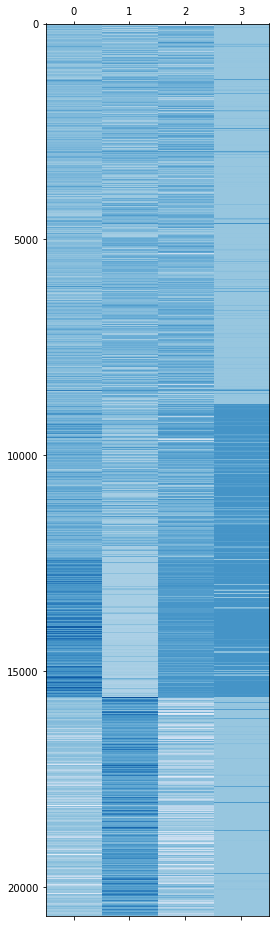

In [682]:
fit_data = bic_data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]
#fit_data

plt.matshow(fit_data, cmap=plt.cm.Blues)
axis = plt.gca()
axis.set_aspect("auto")

In [683]:
"TPR / TFR for  TP/TOTAL_P   FP/TOTAL_N     logLR+ = Log(%TPR / %FPR) "

'TPR / TFR for  TP/TOTAL_P   FP/TOTAL_N     logLR+ = Log(%TPR / %FPR) '

In [684]:
all["label"] = (all.Confidence >= 0.1)

In [685]:
tags = all.tag.unique()
scores = list(all.head().drop("#Chrom Pos Ref Alt Ref.hg19.75 Ref_matched mz46_pre mz100_pre tag Confidence label".split(" "), axis = 1).columns)

(tags, scores)

(array(['F9', 'GP1BB', 'HBB', 'HBG1', 'HNF4A', 'IRF4', 'IRF6', 'LDLR',
        'MSMB', 'MYCrs6983267', 'PKLR', 'SORT1', 'TERT-GBM',
        'TERT-HEK293T', 'ZFAND3', 'aldob', 'ecr11'], dtype=object),
 ['Value',
  'gerp_rs',
  'phyloP100way',
  'phyloP46way',
  'phastCons46way',
  'phastCons100way',
  'mz46_log_diff',
  'mz100_log_diff',
  'mz46_log_diff.hg19.75',
  'mz100_log_diff.hg19.75',
  'CAGE.count',
  'CAGE.dist2max_log',
  'CAGE.count.bymax_log',
  'dnaseScore',
  'dnaseScore.cons',
  'dnaseScore.cons.max',
  'dnaseScore.cons.pval',
  'dnaseScore.cons.pval.max',
  'dnaseScore.bymax',
  'dnaseScore.cons.bymax',
  'dnaseScore.cons.max.bymax',
  'dnaseScore.cons.pval.bymax',
  'dnaseScore.cons.pval.max.bymax'])

In [686]:
!mkdir -p cons_pngs

In [687]:
# Better to iterate over (tag score) not (score tag) ?
tags = all.tag.unique()
scores = list(all.head().drop("#Chrom Pos Ref Alt Ref.hg19.75 Ref_matched mz46_pre mz100_pre tag Confidence label".split(" "), axis = 1).columns)

draw = False
points = 100
save = False

"""
draw = True
points = 200
save = True
"""

for score in scores:
    if not draw:
        break
        
    score_min, score_max = all[score].min(), all[score].max()
    fig, ax = plt.subplots(figsize=(10,10))
    
    for tag in tags:
        slice = all[all["tag"] == tag]
        slice_P = slice.label.sum()
        slice_N = len(slice) - slice_P
        values = []
        for thr in np.linspace(score_min, score_max, points):          
            TP = sum((slice[score] >= thr) & (slice.label))
            FP = sum((slice[score] >= thr) & (slice.label == False))
            values.append(np.log(TP * slice_N) - np.log(slice_P * (FP+0.00001)))
        ax.plot(np.linspace(score_min, score_max, points), values, label = tag)
 
    plt.legend(loc='best')
    plt.title("logLR+ for {}".format(score))
    if save:
        plt.savefig("cons_pngs/logLR_{}.png".format(score))
    plt.show()
    


In [688]:
%ls data/20180127/motif_features_combined_fc_and_pvalue_blocks.tsv.gz

ls: cannot access 'data/20180127/motif_features_combined_fc_and_pvalue_blocks.tsv.gz': No such file or directory


In [690]:
motif_pre = pd.read_csv("data/20180127/motif_features_combined_fc_and_pvalue_blocks.tsv.gz", sep="\t", header = 0)

In [691]:
motif_pre.head()

SNV construction  value  confidence  \
0  F9@138612669@T/C           F9  -0.26        0.24   
1  F9@138612669@T/G           F9   0.34        0.05   
2  F9@138612670@A/C           F9   0.00        0.00   
3  F9@138612670@A/G           F9   0.22        0.20   
4  F9@138612670@A/T           F9   0.12        0.03   

   ANDR_HUMAN.H11DI.0.A:same_strand  ANDR_HUMAN.H11DI.0.A:same_pos  \
0                                 1                              1   
1                                 1                              1   
2                                 1                              1   
3                                 1                              1   
4                                 1                              1   

   ANDR_HUMAN.H11DI.0.A:pval_1_best  ANDR_HUMAN.H11DI.0.A:fc_samepos  \
0                             2.068                           -0.004   
1                             2.068                           -0.432   
2                             2.068                            0.099   
3                             2.068                            0.251   
4                             2.068                            0.389   

   ANDR_HUMAN.H11DI.0.A:fc_best  ANDR_HUMAN.H11DI.0.A:pval_2_best    ...      \
0                        -0.004                             2.064    ...       
1                        -0.432                             1.636    ...       
2                         0.099                             2.168    ...       
3                         0.251                             2.319    ...       
4                         0.389                             2.457    ...       

   ZSC31_HUMAN.H11MO.0.C:pval_2_best  ZSC31_HUMAN.H11MO.0.C:pval_2_samepos  \
0                              2.509                                 1.857   
1                              1.710                                 1.710   
2                              1.952                                 1.602   
3                              1.878                                 1.411   
4                              2.245                                 1.360   

   ZSCA4_HUMAN.H11MO.0.D:same_strand  ZSCA4_HUMAN.H11MO.0.D:same_pos  \
0                                  1                               1   
1                                  0                               0   
2                                  1                               0   
3                                  1                               0   
4                                  1                               0   

   ZSCA4_HUMAN.H11MO.0.D:pval_1_best  ZSCA4_HUMAN.H11MO.0.D:fc_samepos  \
0                              1.295                             0.367   
1                              1.295                            -0.233   
2                              1.295                            -0.484   
3                              1.295                            -0.415   
4                              1.295                            -0.467   

   ZSCA4_HUMAN.H11MO.0.D:fc_best  ZSCA4_HUMAN.H11MO.0.D:pval_2_best  \
0                          0.367                              1.662   
1                         -0.182                              1.114   
2                         -0.099                              1.196   
3                          0.553                              1.849   
4                         -0.099                              1.196   

   ZSCA4_HUMAN.H11MO.0.D:pval_2_samepos  sep_index  
0                                 1.662          0  
1                                 1.062          0  
2                                 0.811          0  
3                                 0.880          0  
4                                 0.828          0  

[5 rows x 7593 columns]

In [692]:
repl_ = dict(filter(lambda x: x[0] != x[1], zip(all.tag.unique(), motif_pre.construction.unique())))
repl_
all["tag"] = all["tag"].apply(lambda x: x in repl_ and repl_[x] or x)
all = all[list(filter(lambda x: x not in ["label"], all.columns))]
all = all.drop_duplicates()
all.tag.unique()
all.columns

Index(['#Chrom', 'Pos', 'Ref', 'Alt', 'Value', 'Confidence', 'tag',
       'Ref.hg19.75', 'Ref_matched', 'gerp_rs', 'phyloP100way', 'phyloP46way',
       'phastCons46way', 'phastCons100way', 'mz46_pre', 'mz100_pre',
       'mz46_log_diff', 'mz100_log_diff', 'mz46_log_diff.hg19.75',
       'mz100_log_diff.hg19.75', 'CAGE.count', 'CAGE.dist2max_log',
       'CAGE.count.bymax_log', 'dnaseScore', 'dnaseScore.cons',
       'dnaseScore.cons.max', 'dnaseScore.cons.pval',
       'dnaseScore.cons.pval.max', 'dnaseScore.bymax', 'dnaseScore.cons.bymax',
       'dnaseScore.cons.max.bymax', 'dnaseScore.cons.pval.bymax',
       'dnaseScore.cons.pval.max.bymax'],
      dtype='object')

In [693]:
repl_

{'HNF4A': 'HNF4A_P2',
 'MYCrs6983267': 'MYC_rs6983267',
 'TERT-GBM': 'TERT_GBM',
 'TERT-HEK293T': 'TERT_HEK293T'}

In [695]:
all[all.Alt != "N"].to_csv("all.with_cons.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")

In [ ]:
# manifold

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(motif_pre.iloc[:,4:-1])

def no_scale(x):
    return x

def my_scale(x):
    return scaler.transform(x)

motif_pre.construction.unique()


In [ ]:
from sklearn import manifold
from collections import defaultdict

def mlle_scale(neib, ncomp, sclr):
    red = defaultdict(lambda:manifold.LocallyLinearEmbedding(neib, n_components = ncomp, method='modified'))
    transformed = []
    for grp_name, grp in motif_pre.groupby("construction"):
        transformed.append(red[grp_name].fit_transform(sclr(grp.iloc[:,4:-1].as_matrix())))
    transformed = np.ma.row_stack(transformed)
    return (transformed, red)


# thnks to https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

# 30 20

In [ ]:
#mtf_scaled_20 = mlle_scale(30, 20, my_scale) # 5.
#mtf_scaled_5 = mlle_scale(20, 5, my_scale) # 2.

In [ ]:
mtf_notscaled_20 = mlle_scale(30, 20, no_scale) # 5.
mtf_notscaled_5 = mlle_scale(20, 5, no_scale) # 2.

In [ ]:
mtf_scaled_50 = mlle_scale(100, 50, my_scale) # 5.

In [ ]:
def plt_mtx(x):
    print(x.shape)
    plt.matshow(x)
    axis = plt.gca()
    axis.set_aspect("auto")

In [ ]:
#plt_mtx(mtf_scaled_20[0])

In [ ]:
plt_mtx(mtf_notscaled_20[0])

In [ ]:
#plt_mtx(mtf_scaled_5[0])

In [ ]:
plt_mtx(mtf_notscaled_5[0])

In [ ]:
#print("Done. Reconstruction error: %g" %  mtf_scaled_20[1]["F9"].reconstruction_error_)
print("Done. Reconstruction error: %g" %  mtf_notscaled_20[1]["F9"].reconstruction_error_)

#print("Done. Reconstruction error: %g" %  mtf_scaled_20[1]["SORT1"].reconstruction_error_)
print("Done. Reconstruction error: %g" %  mtf_notscaled_20[1]["SORT1"].reconstruction_error_)

#print("Done. Reconstruction error: %g" %  mtf_scaled_5[1]["F9"].reconstruction_error_)
print("Done. Reconstruction error: %g" %  mtf_notscaled_5[1]["F9"].reconstruction_error_)


#print("Done. Reconstruction error: %g" %  mtf_scaled_5[1]["SORT1"].reconstruction_error_)
print("Done. Reconstruction error: %g" %  mtf_notscaled_5[1]["SORT1"].reconstruction_error_)


In [ ]:
#clf.embedding_

In [ ]:
motif_20 = motif_pre.iloc[:,:4]
for i in range(20):
    motif_20["mtf_{}".format(i)] = mtf_notscaled_20[0][:,i]
motif_20["sep_index"] = motif_pre["sep_index"]

In [ ]:
motif_5 = motif_pre.iloc[:,:4]
for i in range(5):
    motif_5["mtf_{}".format(i)] = mtf_notscaled_5[0][:,i]
motif_5["sep_index"] = motif_pre["sep_index"]

In [ ]:
motif_50 = motif_pre.iloc[:,:4]
for i in range(50):
    motif_50["mtf_{}".format(i)] = mtf_scaled_50[0][:,i]
motif_50["sep_index"] = motif_pre["sep_index"]

In [ ]:
#motif_50.tail()

In [ ]:
#all.tail()

In [ ]:
all["SNV"] = all["tag Pos Ref Alt".split(" ")].apply(lambda x: '/'.join(map(str,x)).replace("/","@",2), axis = 1).drop_duplicates()
all = all.drop_duplicates()

In [ ]:
#all.head(20)
all.columns


In [ ]:
all.tag.unique()

In [ ]:
motif_20.construction.unique()

In [ ]:
all_SNV_cons = all["SNV gerp_rs phyloP100way phyloP46way phastCons46way phastCons100way mz46_log_diff mz100_log_diff".split(" ")]

In [ ]:
len(all.SNV.unique()), all.shape

In [ ]:
all_SNV_cons.tail()

In [ ]:
beg_col_names = "SNV construction value confidence".split(" ")

In [ ]:
all_SNV_cons_mtf_5 = all_SNV_cons.merge(motif_5, how = "left", on = ["SNV"])

all_SNV_cons_mtf_5 = all_SNV_cons_mtf_5[beg_col_names + list(filter(lambda x: x not in beg_col_names, list(all_SNV_cons_mtf_5.columns)))]

all_SNV_cons_mtf_5 = all_SNV_cons_mtf_5.dropna()
all_SNV_cons_mtf_5["sep_index"] = all_SNV_cons_mtf_5["sep_index"].astype("int")

all_SNV_cons_mtf_5.to_csv("all_snv_cons_mtf_5.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")

all_SNV_cons_mtf_5.tail()


In [ ]:
!zcat all_snv_cons_mtf_5.tsv.gz | cut -f 1 | sort | uniq -c | sort -nr  | head -n 2

In [ ]:
all_SNV_cons_mtf_5[all_SNV_cons_mtf_5.SNV == "TERT_HEK293T@1295362@G/T"]

In [ ]:
all_SNV_cons_mtf_20 = all_SNV_cons.merge(motif_20, how = "left", on = ["SNV"])
all_SNV_cons_mtf_20 = all_SNV_cons_mtf_20[beg_col_names + list(filter(lambda x: x not in beg_col_names, list(all_SNV_cons_mtf_20.columns)))]

all_SNV_cons_mtf_20 = all_SNV_cons_mtf_20.dropna()
all_SNV_cons_mtf_20["sep_index"] = all_SNV_cons_mtf_20["sep_index"].astype("int")

all_SNV_cons_mtf_20.to_csv("all_snv_cons_mtf_20.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")


all_SNV_cons_mtf_20.tail()

In [ ]:
motif_pre.dropna().shape

In [ ]:
all_SNV_cons_mtf_20.shape

In [ ]:
motif_20.shape

In [ ]:
all_SNV_cons_mtf_50 = all_SNV_cons.merge(motif_50, how = "left", on = ["SNV"])
all_SNV_cons_mtf_50 = all_SNV_cons_mtf_50[beg_col_names + list(filter(lambda x: x not in beg_col_names, list(all_SNV_cons_mtf_50.columns)))]

all_SNV_cons_mtf_50 = all_SNV_cons_mtf_50.dropna()
all_SNV_cons_mtf_50["sep_index"] = all_SNV_cons_mtf_50["sep_index"].astype("int")

all_SNV_cons_mtf_50.to_csv("all_snv_cons_mtf_50.tsv.gz", sep = "\t", header=True, index = False, compression="gzip")


all_SNV_cons_mtf_50.tail()